
## 1.For whole of the data



The Path:
* A ) Load & Preprocess Data ✅
    - Remove duplicates, handle missing values
    - Create datetime features (hour, weekday, etc.)
*    ↓
* B ) Feature Engineering ✅
    - Add lag features, rolling stats, trend, etc.
*    ↓
* C ) Train/Validation/Test Split ✅
    - Based on **time** (e.g., past year = train, recent months = test)
*    ↓
* D ) Feature Selection (Correlation + Granger) ✅
    - Only on **training data** to prevent data leakage!
*    ↓
* E ) Standardization or Normalization ✅
    - Fit scaler on **training data only**
    - Apply to all splits (train/val/test)
*    ↓
* F ) Model Training (with uncertainty method)
    - Example: Deep Ensemble, MC Dropout, or Quantile Regression
*    ↓
* G ) Prediction + Uncertainty Estimation
    - Predict energy + uncertainty interval (mean ± std or quantiles)
*    ↓
* H ) Evaluation (Accuracy + Uncertainty)
    - MAE, RMSE + Calibration, CRPS, or coverage %
*    ↓
* I ) Visualization & Export
    - Plot predictions, uncertainty bounds, and export results

## * A ) Load & Preprocess Data ✅

In [1]:
import pandas as pd
# Load the dataset
df = pd.read_parquet("dataset_0.parquet")
# Remove timezone info from the datetime column
df["datetime"] = df["datetime"].dt.tz_localize(None)
# Save to Excel
df.to_excel("0_weather_data_testing_0.xlsx", index=False)
print("Excel file saved successfully.")
print(f"Testing data shape is {df.shape} and number of rows are ({len(df)}).")

################################################################
df = pd.read_parquet("dataset_1.parquet")
# Remove timezone info from the datetime column
df["datetime"] = df["datetime"].dt.tz_localize(None)
# Save to Excel
df.to_excel("1_weather_data_validation_1.xlsx", index=False)
print("Excel file saved successfully.")
print(f"Validation data shape is {df.shape} and number of rows are ({len(df)}).")

################################################################

df_Train = pd.read_parquet("dataset_2.parquet")
# Remove timezone info from the datetime column
df_Train["datetime"] = df_Train["datetime"].dt.tz_localize(None)
# Save to Excel
df_Train.to_excel("2_weather_data_training_2.xlsx", index=False)
print("Excel file saved successfully.")
print(f"Training data shape is {df_Train.shape} and number of rows are ({len(df_Train)}).")


df.isnull().sum()
# Load your data
df = pd.read_parquet("dataset_2.parquet")
# Check full data types
print(" Full Data Types:")
print(df.dtypes)
# Separate columns by type
datetime_cols = df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
# Show results
print("\n Datetime Columns:", datetime_cols)
print(" Numerical Columns:", numerical_cols)
print(" Categorical Columns:", categorical_cols)

Excel file saved successfully.
Testing data shape is (2208, 16) and number of rows are (2208).
Excel file saved successfully.
Validation data shape is (5856, 16) and number of rows are (5856).
Excel file saved successfully.
Training data shape is (11712, 16) and number of rows are (11712).
 Full Data Types:
datetime                 datetime64[us, UTC]
air_temperature                      float64
cloud_amount                         float64
dewpoint_temperature                 float64
diffuse_r                            float64
elspot                               float64
energy                               float64
full_solar                           float64
global_r                             float64
gust_speed                           float64
horizontal_visibility                float64
pressure                             float64
relative_humidity                    float64
sunshine                             float64
wind_direction                       float64
wind_speed      

* A ) Load & Preprocess Data ✅
*    ↓
* B ) Feature Engineering    
*    ↓
* C ) Feature Selection (Correlation + Granger)
*    ↓
* D ) Train/Val/Test Split  
*    ↓
* E ) Standardization (after split!)
*    ↓
* F ) Model Training (with uncertainty method)
*    ↓
* G ) Prediction + Uncertainty Estimation
*   ↓
* H ) Evaluation (accuracy + uncertainty)
*    ↓
* I ) Visualization & Export

## * B and C ) Feature Engineering    ✅

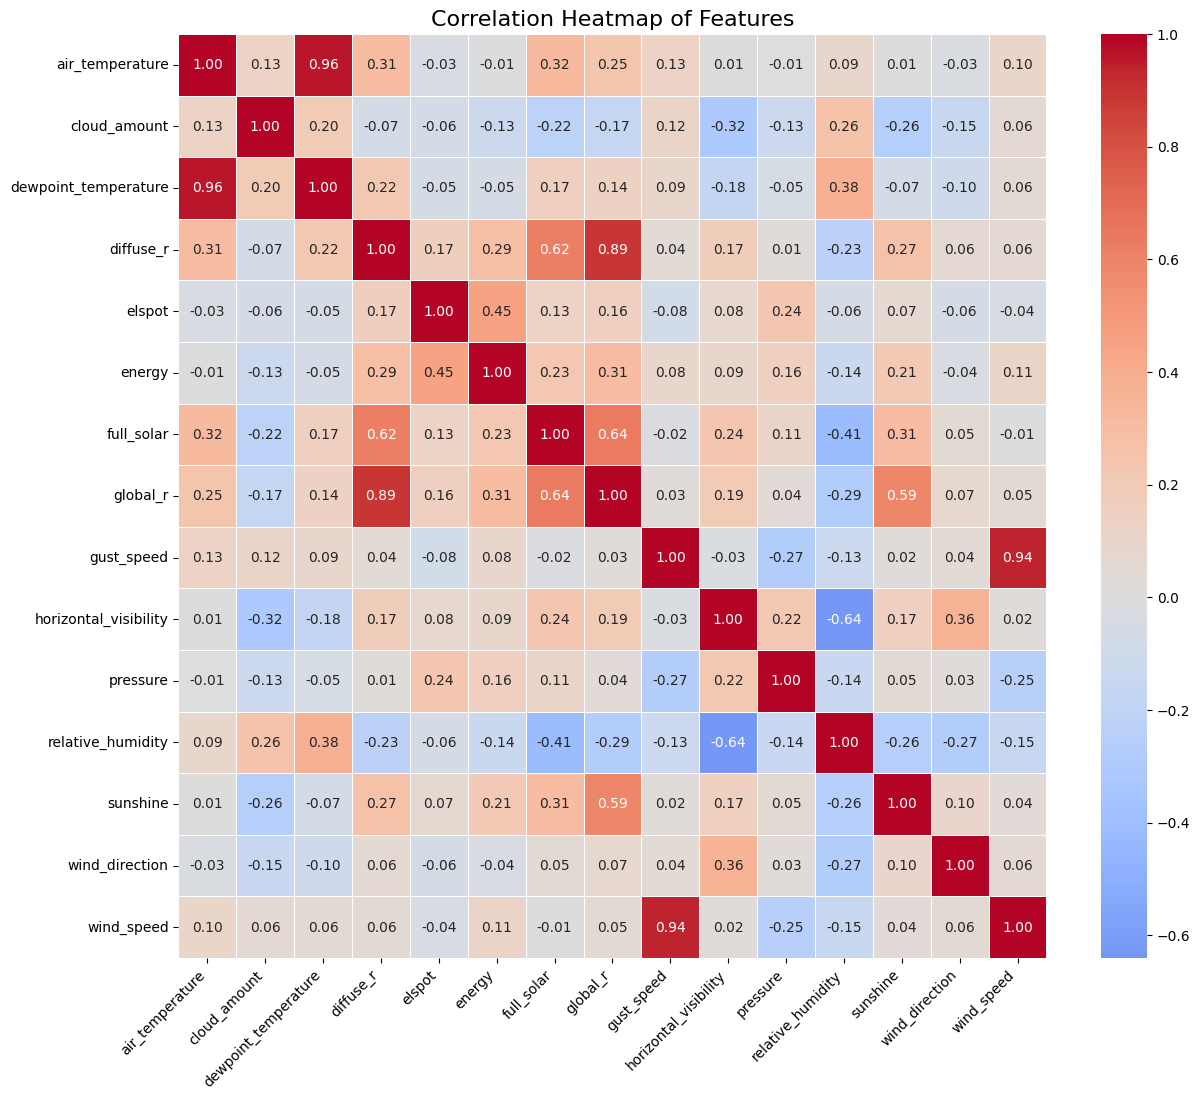

cloud_amount             529
full_solar               503
global_r                 380
diffuse_r                379
elspot                   164
relative_humidity        154
pressure                 127
sunshine                  85
wind_speed                41
dewpoint_temperature      14
air_temperature           13
gust_speed                 9
datetime                   0
energy                     0
horizontal_visibility      0
wind_direction             0
dtype: int64
cloud_amount             138
sunshine                  73
global_r                  71
full_solar                63
diffuse_r                 61
elspot                    45
relative_humidity         37
wind_speed                12
air_temperature            6
dewpoint_temperature       3
gust_speed                 2
energy                     0
horizontal_visibility      0
pressure                   0
wind_direction             0
dtype: int64


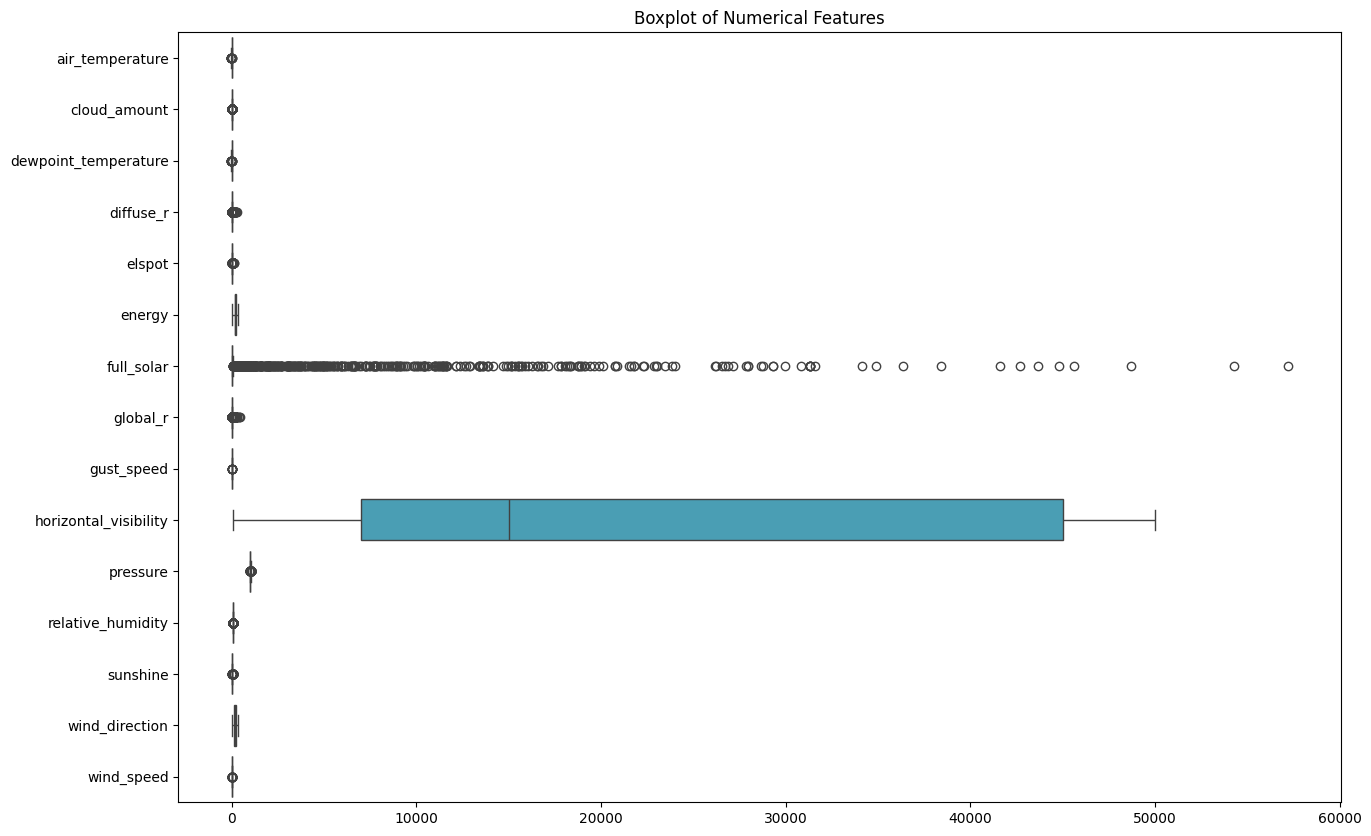

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
# Assuming you already have the DataFrame loaded and processed
df = pd.read_parquet("dataset_0.parquet")
df_numeric = df.drop(columns=["datetime"])
corr = df_numeric.corr()

# Plot
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Save to file
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()
df.corr()

import pandas as pd

# Assuming df is your DataFrame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum().sort_values(ascending=False)
print(outlier_counts)

z_scores = df.select_dtypes(include=['float64', 'int64']).apply(zscore)
outliers_z = (z_scores.abs() > 3)
outlier_counts_z = outliers_z.sum().sort_values(ascending=False)
print(outlier_counts_z)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot all features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include='number'), orient="h")
plt.title("Boxplot of Numerical Features")

# Save before showing
plt.savefig("Boxplot of Numerical Features.png", dpi=300, bbox_inches='tight')
plt.show()



* Starting date: 2018-11-16
* Ending date: 2020-03-14
* Number of days: 484
* Number of months: 16

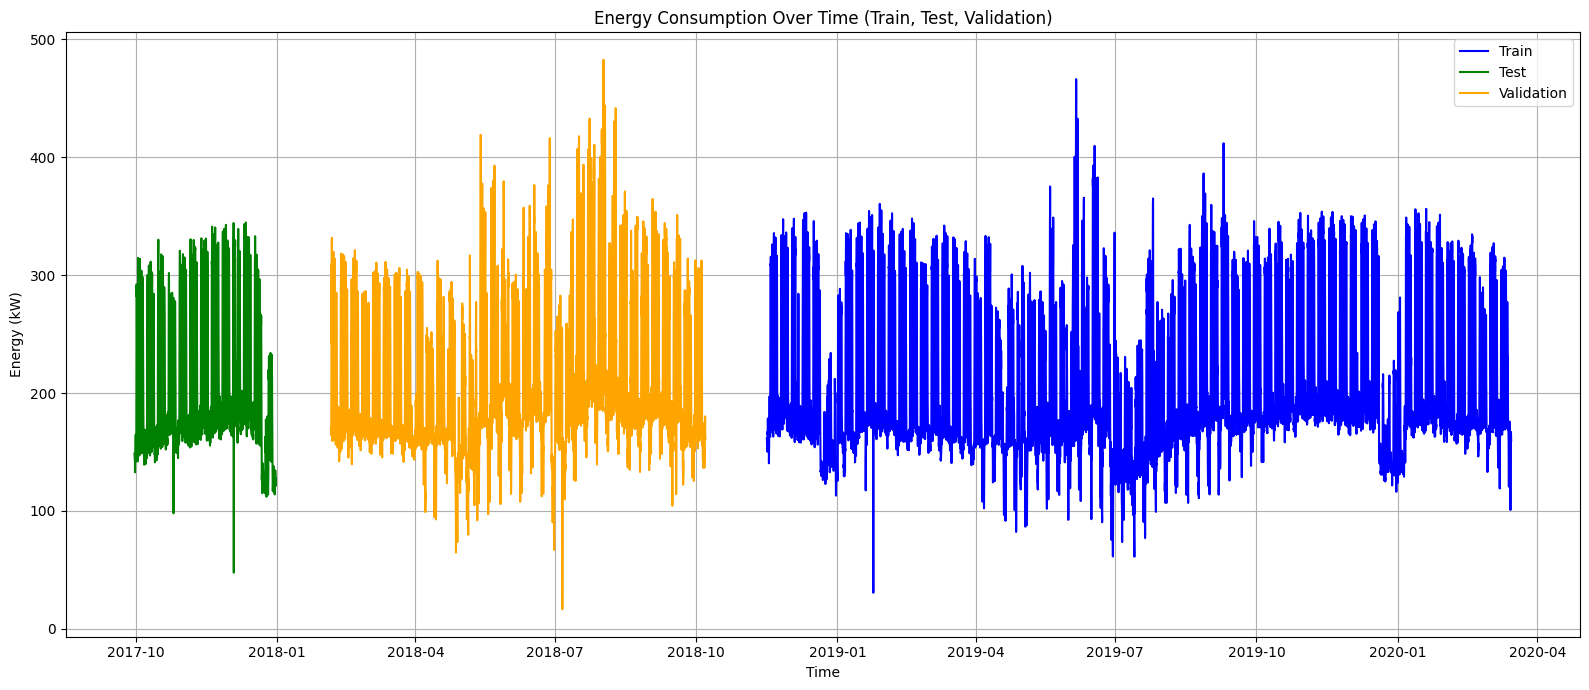

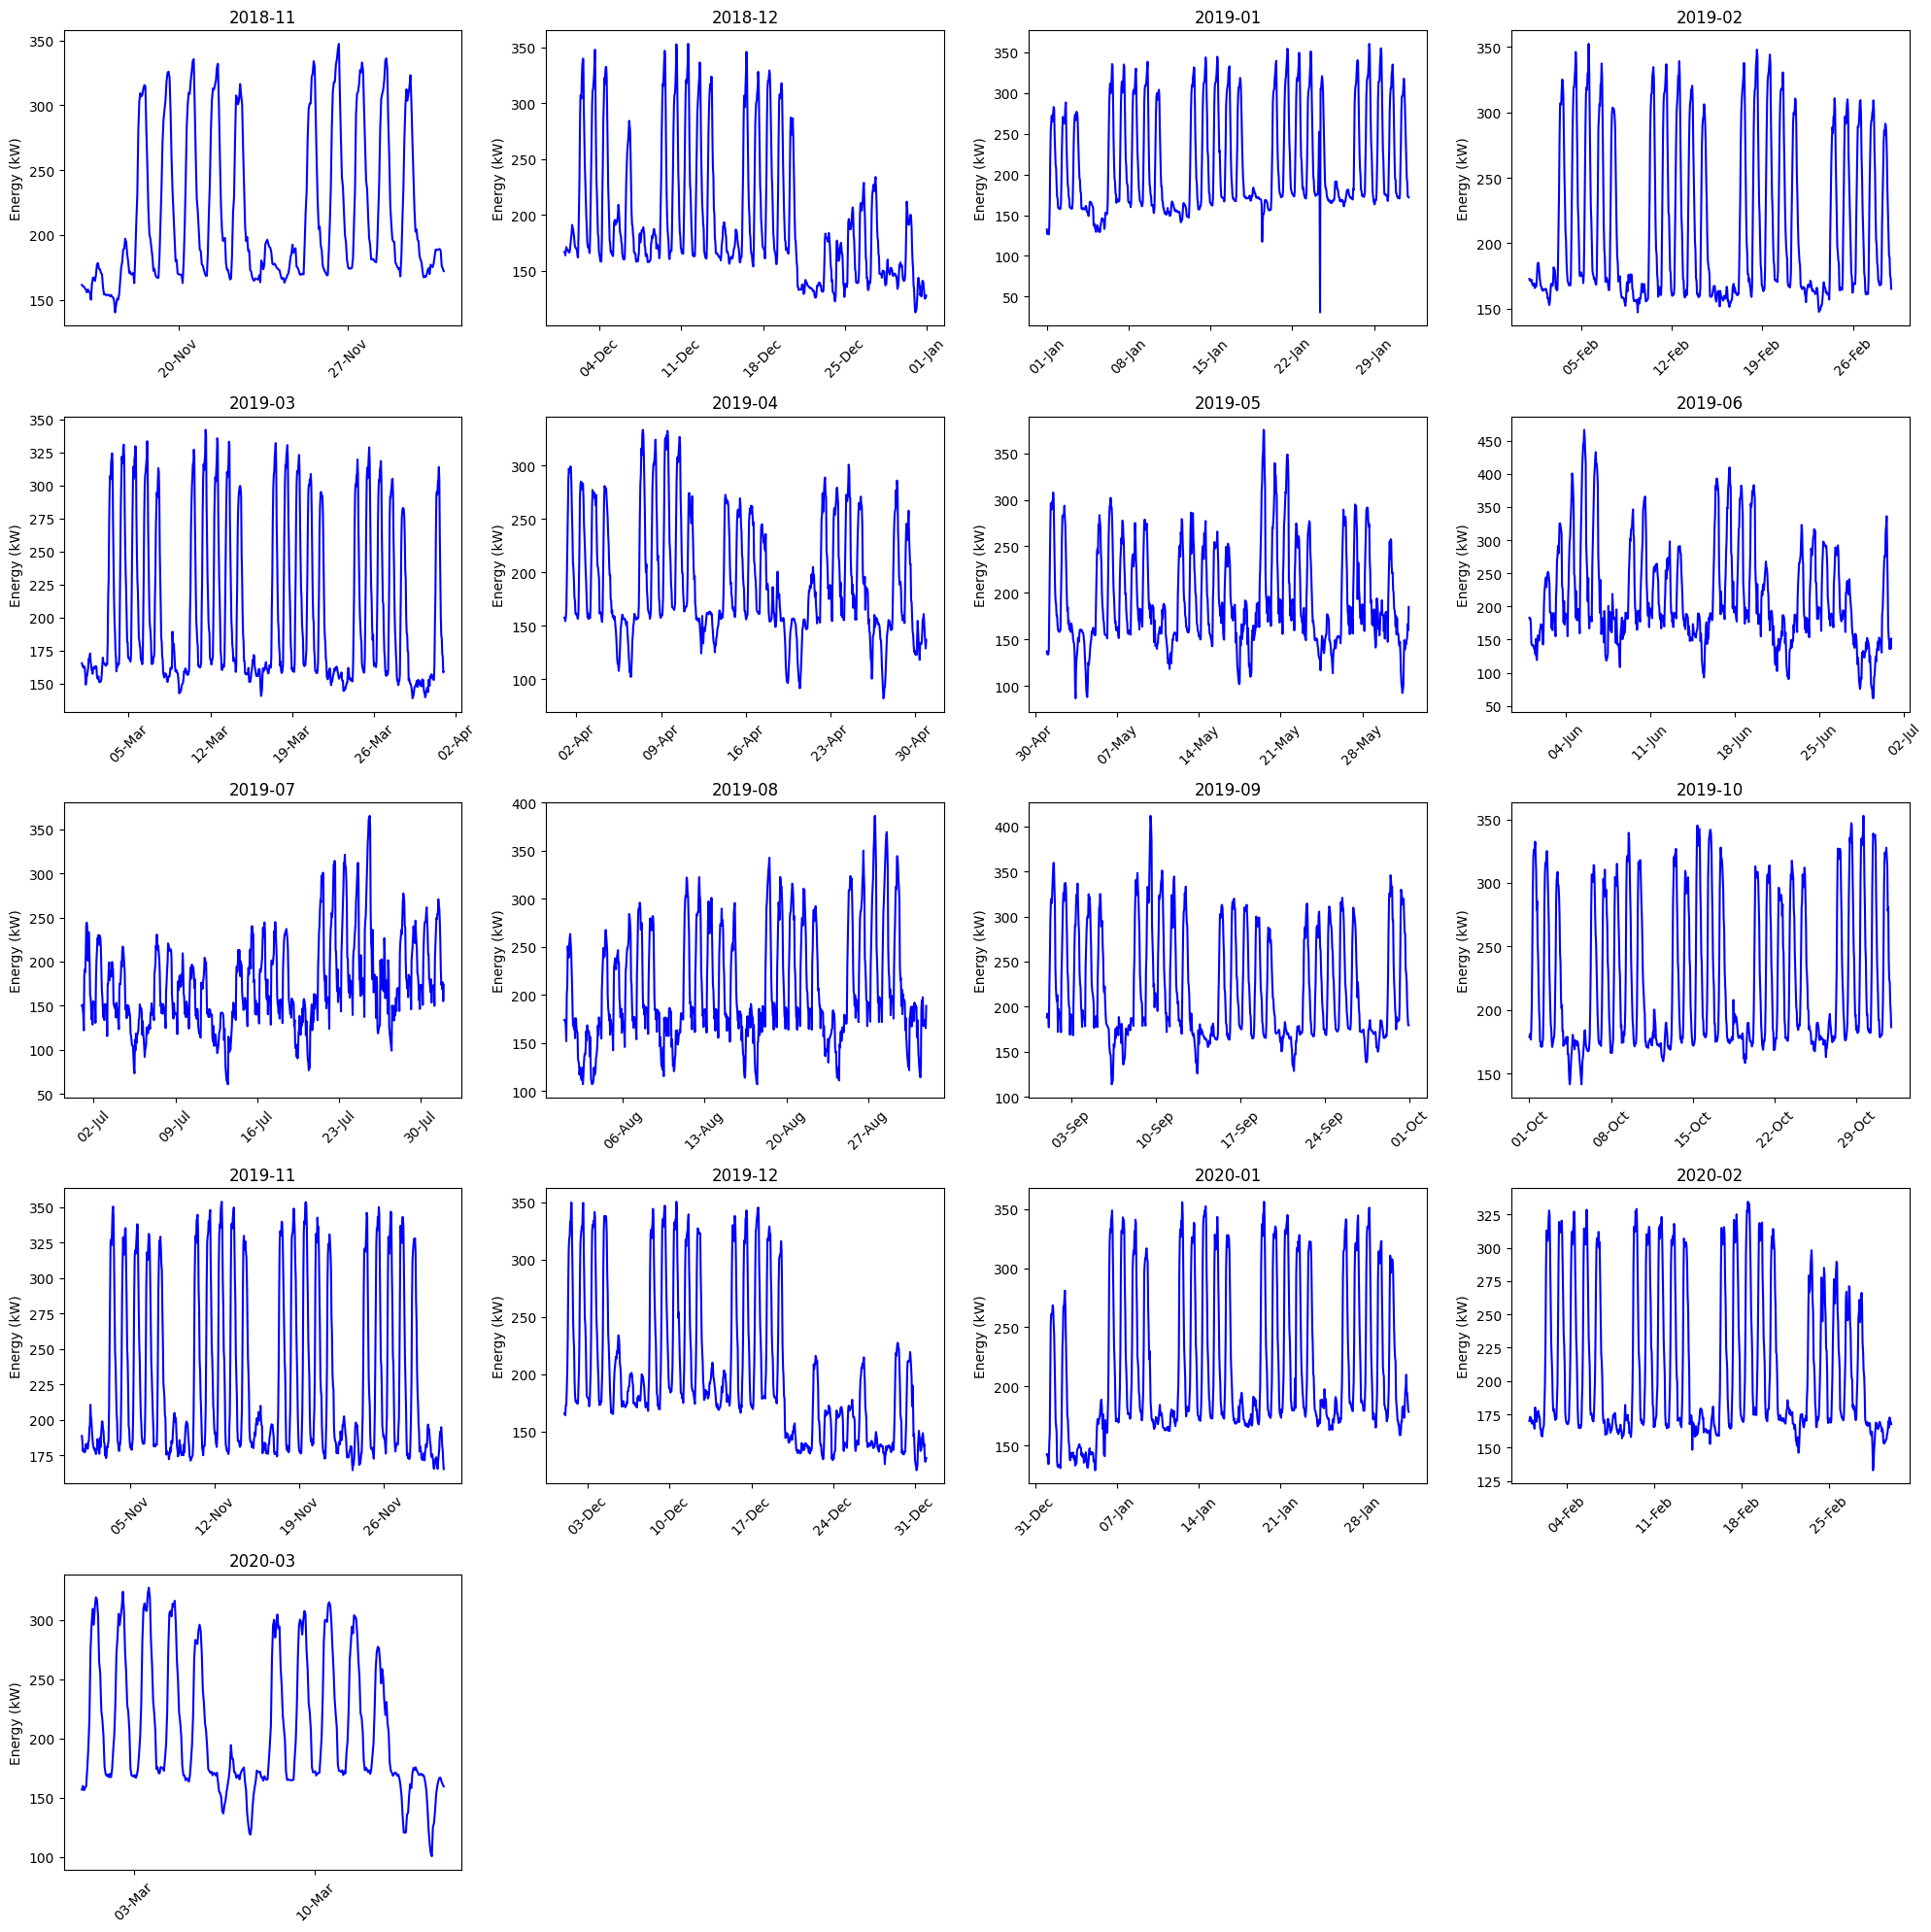

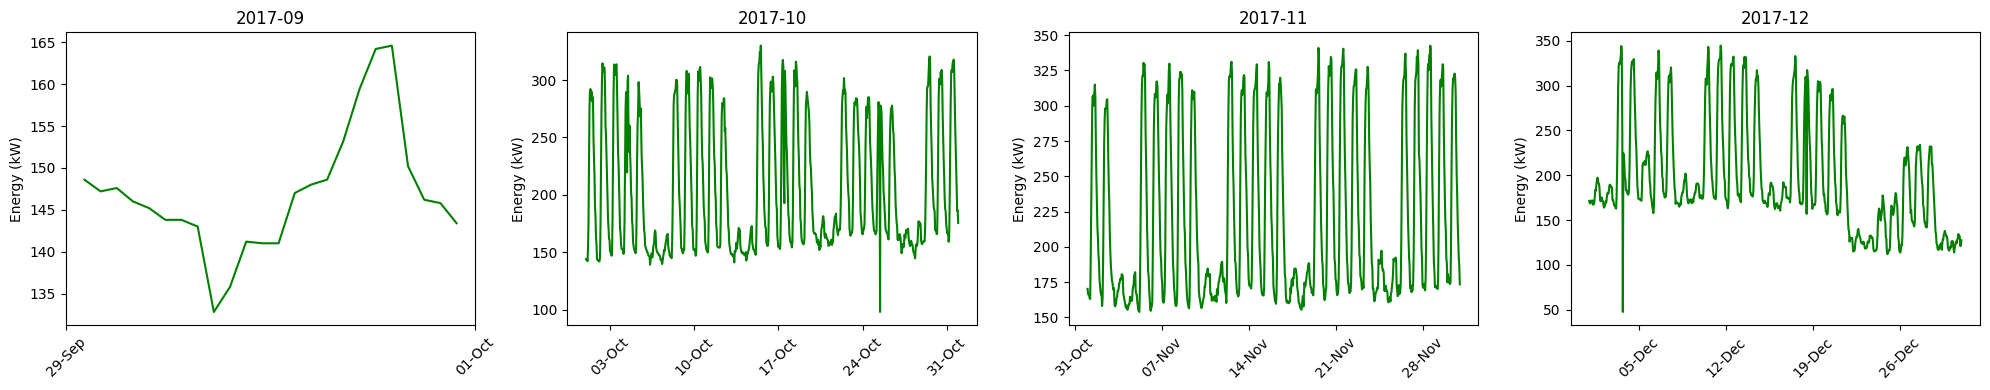

In [3]:


# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load each Excel file
df_Train = pd.read_excel("2_weather_data_training_2.xlsx")
df_Test = pd.read_excel("0_weather_data_testing_0.xlsx")
df_Val = pd.read_excel("1_weather_data_validation_1.xlsx")

# Convert 'datetime' column to datetime type
df_Train['datetime'] = pd.to_datetime(df_Train['datetime'])
df_Test['datetime'] = pd.to_datetime(df_Test['datetime'])
df_Val['datetime'] = pd.to_datetime(df_Val['datetime'])

# Plot all three datasets
plt.figure(figsize=(16, 7))
plt.plot(df_Train['datetime'], df_Train['energy'], label='Train', color='blue')
plt.plot(df_Test['datetime'], df_Test['energy'], label='Test', color='green')
plt.plot(df_Val['datetime'], df_Val['energy'], label='Validation', color='orange')

# Formatting
plt.xlabel('Time')
plt.ylabel('Energy (kW)')
plt.title('Energy Consumption Over Time (Train, Test, Validation)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # ✅ import for handling date axes

# Load the Excel file
file_path = "2_weather_data_training_2.xlsx"
df_Train = pd.read_excel(file_path)

# Convert the 'datetime' column to datetime type
df_Train['datetime'] = pd.to_datetime(df_Train['datetime'])

# Set datetime as index for easier filtering
df_Train.set_index('datetime', inplace=True)

# Determine how many unique months we have
unique_months = df_Train.groupby([df_Train.index.year, df_Train.index.month]).ngroups
ncols = 4
nrows = (unique_months + ncols - 1) // ncols  # ceiling division

# Create subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axs = axs.flatten()

# Loop through each month and plot energy vs. time
for i, ((year, month), group) in enumerate(df_Train.groupby([df_Train.index.year, df_Train.index.month])):
    axs[i].plot(group.index, group['energy'], color='blue')
    axs[i].set_title(f"{year}-{month:02d}")
    axs[i].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_ylabel('Energy (kW)')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

# Layout and display
plt.tight_layout()
plt.show()

# Load the Excel file
file_path = "0_weather_data_testing_0.xlsx"
df_Test = pd.read_excel(file_path)

# Convert the 'datetime' column to datetime type
df_Test['datetime'] = pd.to_datetime(df_Test['datetime'])

# Set datetime as index for easier filtering
df_Test.set_index('datetime', inplace=True)

# Determine how many unique months we have
unique_months = df_Test.groupby([df_Test.index.year, df_Test.index.month]).ngroups
ncols = 4
nrows = (unique_months + ncols - 1) // ncols  # ceiling division

# Create subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axs = axs.flatten()

# Loop through each month and plot energy vs. time
for i, ((year, month), group) in enumerate(df_Test.groupby([df_Test.index.year, df_Test.index.month])):
    axs[i].plot(group.index, group['energy'], color='green')
    axs[i].set_title(f"{year}-{month:02d}")
    axs[i].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_ylabel('Energy (kW)')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

# Layout and display
plt.tight_layout()
plt.show()


| Method                 | Type              | Pros                           | Notes                        |
| ---------------------- | ----------------- | ------------------------------ | ---------------------------- |
| Correlation            | Statistical       | Fast, interpretable            | Linear only                  |
| RandomForest / XGBoost | Model-based       | Captures nonlinearity          | Needs fitting                |
| Permutation Importance | Model-based       | Measures real performance drop | Slower                       |
| SHAP                   | Model-based       | Very detailed and visual       | Requires SHAP lib            |
| RFE                    | Wrapper method    | Finds minimal sets             | Slower                       |
| Granger Causality      | Time-series stats | Causal inference               | Only for time-series columns |
*
*
*

| Feature Selection Method                       | Requires Model Training? | Usable Before Model Training? | Explanation                                                                     |
| ---------------------------------------------- | ------------------------ | ----------------------------- | ------------------------------------------------------------------------------- |
| ✅ **Correlation**                              | ❌ No                     | ✅ Yes                         | Fastest statistical method to filter irrelevant features (linear relationships) |
| ✅ **Granger Causality**                        | ❌ No                     | ✅ Yes                         | Used for time series to detect causality before modeling                        |
| ⚠️ **RFE (Recursive Feature Elimination)**     | ✅ Yes                    | ❌ No                          | Internally trains a model multiple times to eliminate features                  |
| ✅ **Univariate Selection** (e.g. chi², f-test) | ❌ No                     | ✅ Yes                         | Good for initial filtering, mostly for classification tasks                     |
| ❌ **Random Forest Importance**                 | ✅ Yes                    | ❌ No                          | Only available after fitting the model                                          |
| ❌ **Permutation Importance**                   | ✅ Yes                    | ❌ No                          | Requires a trained model to test performance drop per feature                   |
| ❌ **SHAP Values**                              | ✅ Yes                    | ❌ No                          | Used for post-training interpretability of feature impact                       |


In [4]:
import pandas as pd
# Load your data
df = pd.read_excel("2_weather_data_training_2.xlsx")
# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'])
# Extract time-based features
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday
df['month'] = df['datetime'].dt.month
df['dayofyear'] = df['datetime'].dt.dayofyear
# Drop datetime for correlation analysis
df_corr = df.drop(columns=['datetime'])

# Compute correlations with 'energy'
correlations = df_corr.corr()['energy'].sort_values(ascending=False)

# Show top correlated features
print(correlations)





energy                   1.000000
elspot                   0.269041
diffuse_r                0.213942
global_r                 0.164275
full_solar               0.133066
sunshine                 0.114353
gust_speed               0.099666
hour                     0.091374
wind_speed               0.083593
air_temperature          0.035364
cloud_amount             0.033265
pressure                 0.024049
dewpoint_temperature     0.010044
wind_direction           0.001989
month                   -0.001882
dayofyear               -0.004957
horizontal_visibility   -0.021983
relative_humidity       -0.055665
weekday                 -0.248812
Name: energy, dtype: float64


step one: selected_features Based on the correlation

In [5]:
selected_features1 = [
    'elspot',          # +0.269 → strong positive correlation
    'diffuse_r',       # +0.214 → solar radiation (diffuse)
    'global_r',        # +0.164 → solar radiation (global)
    'full_solar',      # +0.133 → total solar energy
    'sunshine',        # +0.114 → limited reliability, moderate correlation (optional)
    'gust_speed',      # +0.100 → slight positive correlation (optional)
    'hour',            # +0.091 → weak, but useful for temporal patterns
    'weekday'          # –0.249 → strong negative correlation (very useful!)
]

| Feature                | Lag 1        | Lag 2        | Lag 3        | Granger-Causal? |
| ---------------------- | ------------ | ------------ | ------------ | --------------- |
| `air_temperature`      | 0.0527 ❌     | **0.0000** ✅ | **0.0000** ✅ | ✅ (from lag 2)  |
| `diffuse_r`            | **0.0089** ✅ | **0.0000** ✅ | **0.0000** ✅ | ✅               |
| `dewpoint_temperature` | 0.1055 ❌     | **0.0237** ✅ | 0.0797 ❌     | ✅ (weak)        |
| `elspot`               | 0.3541 ❌     | **0.0000** ✅ | **0.0000** ✅ | ✅ (from lag 2)  |
| `full_solar`           | 0.7152 ❌     | **0.0000** ✅ | **0.0000** ✅ | ✅ (from lag 2)  |
| `global_r`             | **0.0000** ✅ | **0.0000** ✅ | **0.0000** ✅ | ✅               |
| `gust_speed`           | 0.2062 ❌     | **0.0000** ✅ | **0.0000** ✅ | ✅ (from lag 2)  |
| `pressure`             | **0.0000** ✅ | 0.2743 ❌     | **0.0207** ✅ | ✅               |
| `relative_humidity`    | **0.0001** ✅ | **0.0000** ✅ | **0.0000** ✅ | ✅               |
| `wind_direction`       | 0.6085 ❌     | 0.3092 ❌     | **0.0187** ✅ | ✅ (only lag 3)  |
| `wind_speed`           | 0.297 ❌      | **0.0000** ✅ | **0.0000** ✅ | ✅ (from lag 2)  |
| `hour`                 | **0.0000** ✅ | **0.0000** ✅ | **0.0000** ✅ | ✅               |
| `weekday`              | **0.0004** ✅ | **0.0013** ✅ | **0.0002** ✅ | ✅               |
| `sunshine`             | 0.9836 ❌     | **0.0000** ✅ | **0.0000** ✅ | ✅ (from lag 2)  |

❌ Not Granger-Causal (All p > 0.05):
| Feature                 | Reason       |
| ----------------------- | ------------ |
| `cloud_amount`          | All p > 0.70 |
| `horizontal_visibility` | All p > 0.07 |
| `month`                 | All p > 0.21 |
| `dayofyear`             | All p > 0.20 |


In [6]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Load your Excel file
df = pd.read_excel("2_weather_data_training_2.xlsx")

# Convert datetime column and set it as index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Create time-based features
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear

# Get all columns except the target variable
features_to_test = [col for col in df.columns if col != 'energy']

# Dictionary to store p-values of Granger test
granger_results = {}

# Run Granger causality test for each feature
for feature in features_to_test:
    try:
        # Drop missing values
        data = df[[feature, 'energy']].dropna()

        # Perform Granger test (maxlag = 3)
        result = grangercausalitytests(data, maxlag=3)


        # Extract p-values from SSR F-test
        p_values = [round(result[lag][0]['ssr_ftest'][1], 4) for lag in range(1, 4)]

        # Store the result
        granger_results[feature] = p_values
    except Exception as e:
        granger_results[feature] = [f"Error: {str(e)}"] * 3

# Print the results
print("Granger Causality Test (p-values for lags 1 to 3):\n")
print(f"{'Feature':<25} {'Lag 1':<10} {'Lag 2':<10} {'Lag 3':<10}")
print("-" * 60)
for feature, pvals in granger_results.items():
    print(f"{feature:<25} {pvals[0]:<10} {pvals[1]:<10} {pvals[2]:<10}")



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7545  , p=0.0527  , df_denom=11708, df_num=1
ssr based chi2 test:   chi2=3.7555  , p=0.0526  , df=1
likelihood ratio test: chi2=3.7549  , p=0.0527  , df=1
parameter F test:         F=3.7545  , p=0.0527  , df_denom=11708, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=109.2857, p=0.0000  , df_denom=11705, df_num=2
ssr based chi2 test:   chi2=218.6648, p=0.0000  , df=2
likelihood ratio test: chi2=216.6483, p=0.0000  , df=2
parameter F test:         F=109.2857, p=0.0000  , df_denom=11705, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=76.6401 , p=0.0000  , df_denom=11702, df_num=3
ssr based chi2 test:   chi2=230.0578, p=0.0000  , df=3
likelihood ratio test: chi2=227.8269, p=0.0000  , df=3
parameter F test:         F=76.6401 , p=0.0000  , df_denom=11702, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1451  

Step two feature selection based on features_Granger

In [7]:
selected_features_Granger = [
    'air_temperature',
    'diffuse_r',
    'dewpoint_temperature',
    'elspot',
    'full_solar',
    'global_r',
    'gust_speed',
    'pressure',
    'relative_humidity',
    'wind_direction',
    'wind_speed',
    'hour',
    'weekday',
    'sunshine'
]


| Feature                | Correlation   | Granger Causality | Use?     |
|------------------------|---------------|--------------------|----------|
| air_temperature        | ✅ Low         | ✅ Lag 2–3          | ✅ Keep   |
| cloud_amount           | ❌ Very Low    | ❌ No               | ❌ Drop   |
| dewpoint_temperature   | ❌ Very Low    | ✅ Lag 2            | ✅ Maybe  |
| diffuse_r              | ✅ Medium      | ✅ All Lags         | ✅ Keep   |
| elspot                 | ✅ Medium      | ✅ Lag 2–3          | ✅ Keep   |
| full_solar             | ✅ Low         | ✅ Lag 2–3          | ✅ Keep   |
| global_r               | ✅ Medium      | ✅ All Lags         | ✅ Keep   |
| gust_speed             | ✅ Low         | ✅ Lag 2–3          | ✅ Keep   |
| horizontal_visibility  | ❌ Near Zero   | ❌ Weak             | ❌ Drop   |
| pressure               | ❌ Very Low    | ✅ Lag 1/3          | ✅ Maybe  |
| relative_humidity      | ❌ Negative    | ✅ All Lags         | ✅ Keep   |
| sunshine               | ✅ Low         | ✅ Lag 2–3          | ✅ Keep   |
| wind_direction         | ❌ Near Zero   | ✅ Lag 3            | ✅ Maybe  |
| wind_speed             | ✅ Low         | ✅ Lag 2–3          | ✅ Keep   |
| hour                   | ✅ Medium      | ✅ All Lags         | ✅ Keep   |
| weekday                | ❌ Negative    | ✅ All Lags         | ✅ Keep   |
| month                  | ❌ Negative    | ❌ No               | ❌ Drop   |
| dayofyear              | ❌ Negative    | ❌ No               | ❌ Drop   |


End selected features

In [8]:
# Selected features for energy prediction
selected_features = [
    'air_temperature',       # importance ≈ 3.5%   (✅ required)
    'diffuse_r',             # importance ≈ 21.4%  (✅ required)
    'elspot',                # importance ≈ 26.9%  (✅ required)
    'full_solar',            # importance ≈ 13.3%  (✅ required)
    'global_r',              # importance ≈ 16.4%  (✅ required)
    'gust_speed',            # importance ≈ 9.9%   (⚠️ optional)
    'relative_humidity',     # importance ≈ 5.6%   (⚠️ optional)
    'sunshine',              # importance ≈ 11.4%  (⚠️ optional)
    'wind_speed',            # importance ≈ 8.4%   (⚠️ optional)
    'hour',                  # importance ≈ 9.1%   (✅ required)
    'weekday',               # importance ≈ 24.9%  (✅ required, despite negative correlation)
]



=== Outlier & Range Analysis ===

📌 Feature: air_temperature
  ➤ Min value     : -25.600
  ➤ Max value     : 30.000
  ➤ Mean ± Std    : 3.75 ± 8.72
  ⚠ Outliers found: 8
    Outlier values (first 5): [-23.9 -23.  -25.6 -25.3 -25.6]

📌 Feature: diffuse_r
  ➤ Min value     : 0.000
  ➤ Max value     : 579.500
  ➤ Mean ± Std    : 36.86 ± 68.18
  ⚠ Outliers found: 320
    Outlier values (first 5): [250.9 263.1 256.9 325.5 322. ]

📌 Feature: elspot
  ➤ Min value     : -0.200
  ➤ Max value     : 199.980
  ➤ Mean ± Std    : 41.96 ± 16.38
  ⚠ Outliers found: 68
    Outlier values (first 5): [ 94.37 103.   128.26 109.94  91.57]

📌 Feature: full_solar
  ➤ Min value     : -9850.941
  ➤ Max value     : 110209.932
  ➤ Mean ± Std    : 10314.60 ± 22572.81
  ⚠ Outliers found: 436
    Outlier values (first 5): [80866.65798 87138.68207 87157.44208 83007.02143 93027.88438]

📌 Feature: global_r
  ➤ Min value     : 0.000
  ➤ Max value     : 1041.300
  ➤ Mean ± Std    : 88.18 ± 174.09
  ⚠ Outliers found: 404

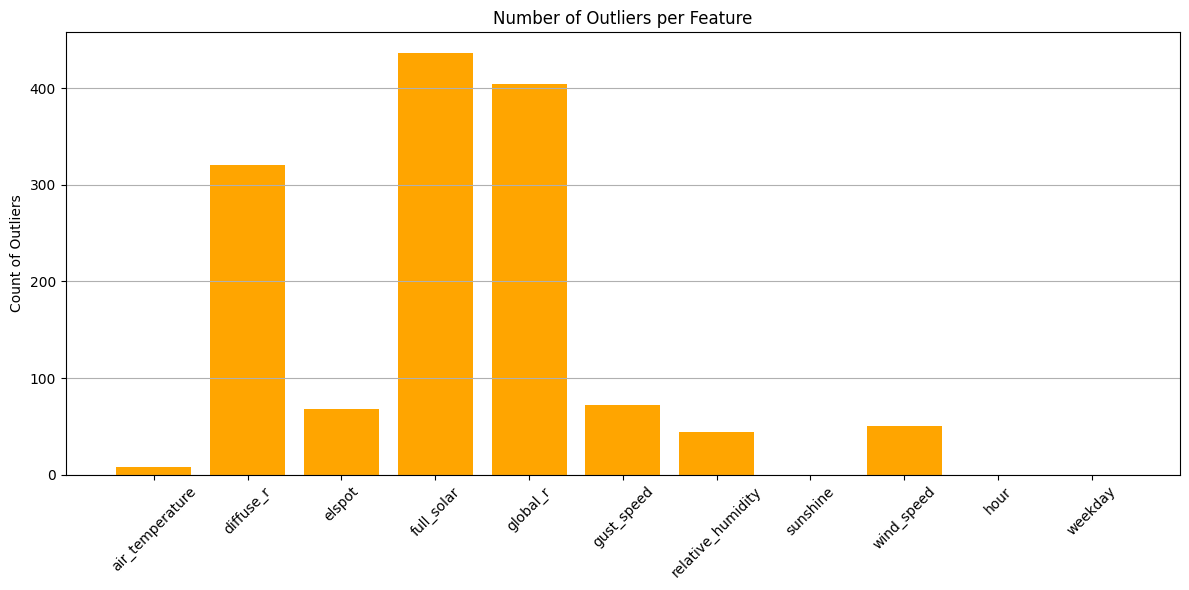

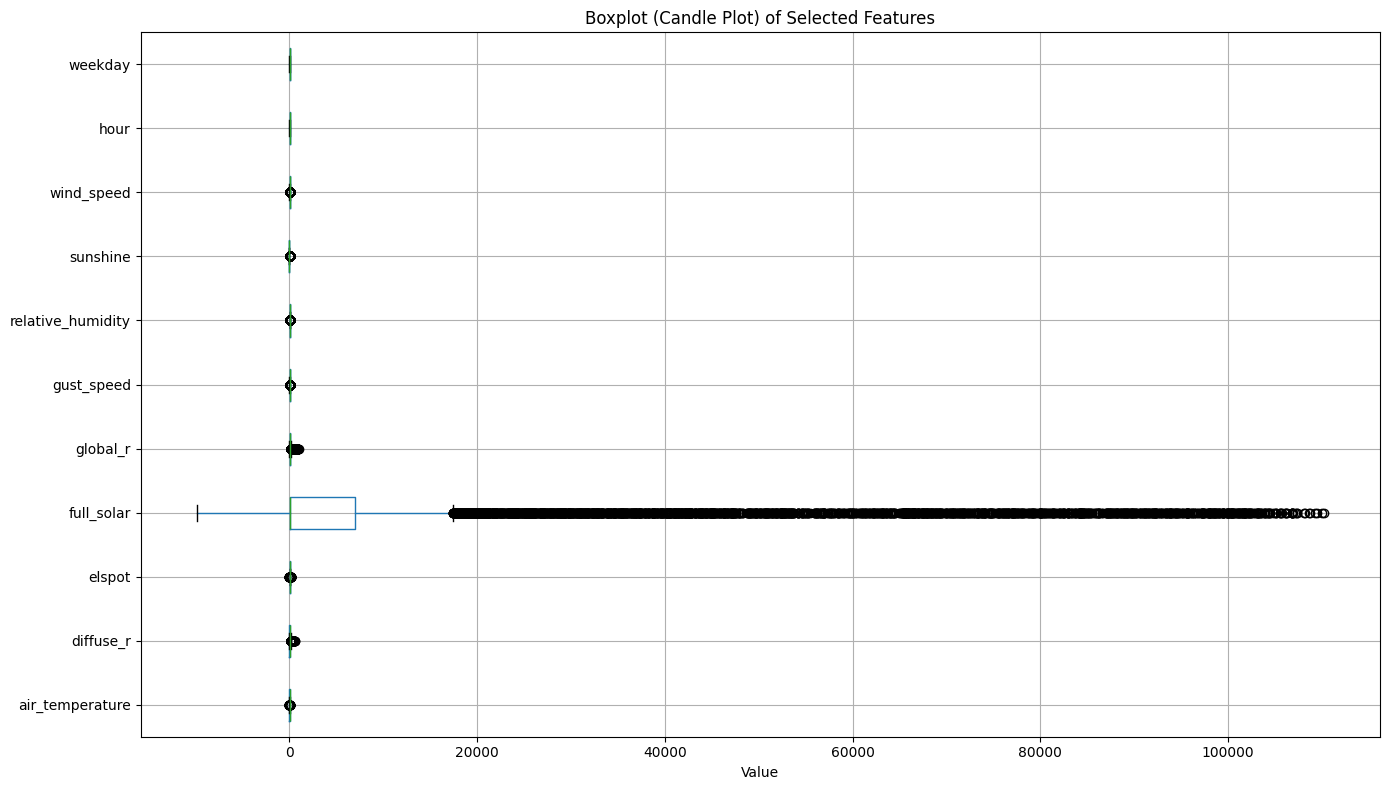

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load training data
df_Train = pd.read_excel("2_weather_data_training_2.xlsx")

# Add 'hour' and 'weekday' columns
df_Train['datetime'] = pd.to_datetime(df_Train['datetime'])
df_Train['hour'] = df_Train['datetime'].dt.hour
df_Train['weekday'] = df_Train['datetime'].dt.weekday

# Selected features for analysis
selected_features = [
    'air_temperature',
    'diffuse_r',
    'elspot',
    'full_solar',
    'global_r',
    'gust_speed',
    'relative_humidity',
    'sunshine',
    'wind_speed',
    'hour',
    'weekday',
]

# Dictionary to store outlier counts
outlier_counts = {}

# Outlier detection and summary statistics
print("=== Outlier & Range Analysis ===")
for feature in selected_features:
    data = df_Train[feature].dropna()
    z_scores = zscore(data)
    outliers = data[np.abs(z_scores) > 3]
    outlier_counts[feature] = len(outliers)

    print(f"\n📌 Feature: {feature}")
    print(f"  ➤ Min value     : {data.min():.3f}")
    print(f"  ➤ Max value     : {data.max():.3f}")
    print(f"  ➤ Mean ± Std    : {data.mean():.2f} ± {data.std():.2f}")
    print(f"  ⚠ Outliers found: {len(outliers)}")
    if len(outliers) > 0:
        print(f"    Outlier values (first 5): {outliers.head().values}")

# -----------------------------
# Bar Plot of Outlier Counts
# -----------------------------
plt.figure(figsize=(12, 6))
plt.bar(outlier_counts.keys(), outlier_counts.values(), color='orange')
plt.title("Number of Outliers per Feature")
plt.ylabel("Count of Outliers")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# -----------------------------
# Boxplot (Candle Plot)
# -----------------------------
plt.figure(figsize=(14, 8))
df_Train[selected_features].boxplot(vert=False)
plt.title("Boxplot (Candle Plot) of Selected Features")
plt.xlabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


standardization

In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the datasets
df_Train = pd.read_excel("2_weather_data_training_2.xlsx")
df_Test = pd.read_excel("0_weather_data_testing_0.xlsx")
df_Val = pd.read_excel("1_weather_data_validation_1.xlsx")

# Add hour and weekday to all DataFrames
for df in [df_Train, df_Test, df_Val]:
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday

# Define selected features
selected_features = [
    'air_temperature', 'diffuse_r', 'elspot', 'full_solar',
    'global_r', 'gust_speed', 'relative_humidity', 'sunshine',
    'wind_speed', 'hour', 'weekday'
]

# Extract selected features
X_train = df_Train[selected_features].copy()
X_test = df_Test[selected_features].copy()
X_val = df_Val[selected_features].copy()

# Standardize features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=selected_features, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=selected_features, index=X_test.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=selected_features, index=X_val.index)


=== Outlier & Range Analysis (Standardized) ===

📌 Feature: air_temperature
  ➤ Min value     : -3.365
  ➤ Max value     : 3.010
  ➤ Mean ± Std    : -0.00 ± 1.00
  ⚠ Outliers found: 8
    Outlier values (first 5): [-3.17033215 -3.06713594 -3.36525832 -3.33085958 -3.36525832]

📌 Feature: diffuse_r
  ➤ Min value     : -0.541
  ➤ Max value     : 7.959
  ➤ Mean ± Std    : -0.00 ± 1.00
  ⚠ Outliers found: 320
    Outlier values (first 5): [3.13942081 3.31836246 3.2274249  4.23360499 4.18226928]

📌 Feature: elspot
  ➤ Min value     : -2.573
  ➤ Max value     : 9.645
  ➤ Mean ± Std    : -0.00 ± 1.00
  ⚠ Outliers found: 68
    Outlier values (first 5): [3.19901336 3.72576628 5.26757146 4.14936596 3.02810859]

📌 Feature: full_solar
  ➤ Min value     : -0.893
  ➤ Max value     : 4.426
  ➤ Mean ± Std    : -0.00 ± 1.00
  ⚠ Outliers found: 436
    Outlier values (first 5): [3.12566683 3.40353622 3.40436734 3.22049132 3.66444546]

📌 Feature: global_r
  ➤ Min value     : -0.507
  ➤ Max value     : 5.

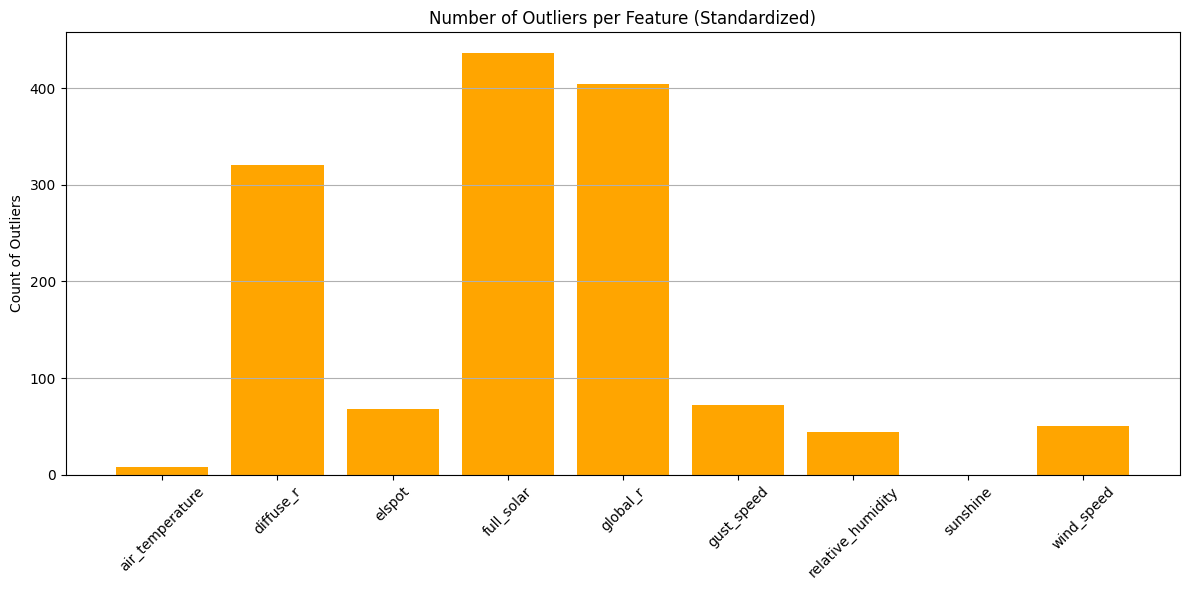

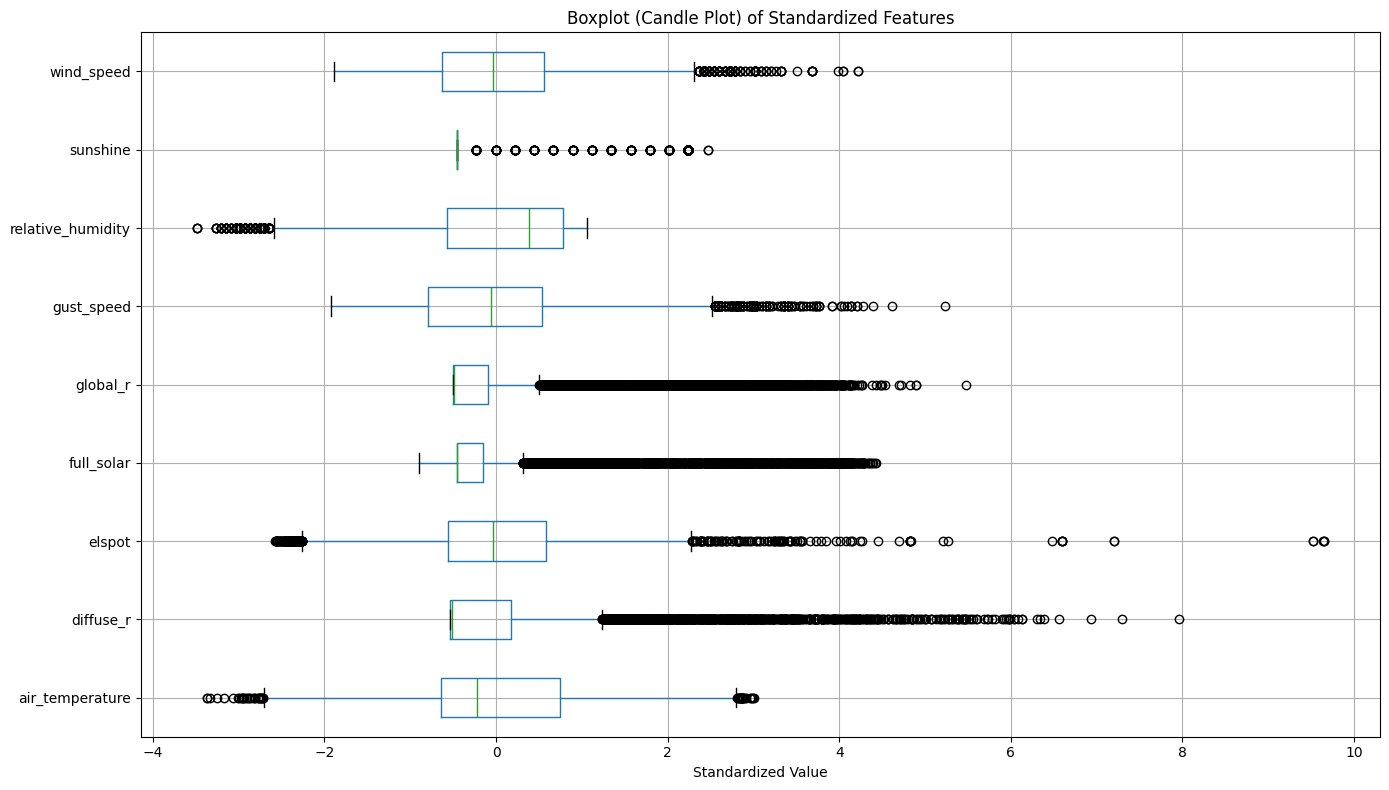

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Load data
df_Train = pd.read_excel("2_weather_data_training_2.xlsx")
df_Test = pd.read_excel("0_weather_data_testing_0.xlsx")
df_Val = pd.read_excel("1_weather_data_validation_1.xlsx")

# Add 'hour' and 'weekday' if needed (used only in preprocessing, not analysis)
for df in [df_Train, df_Test, df_Val]:
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday

# Selected features (excluding datetime, hour, weekday)
selected_features = [
    'air_temperature', 'diffuse_r', 'elspot', 'full_solar',
    'global_r', 'gust_speed', 'relative_humidity', 'sunshine',
    'wind_speed'
]

# Standardize selected features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(df_Train[selected_features]),
                              columns=selected_features, index=df_Train.index)

# Outlier detection and statistics
outlier_counts = {}

print("=== Outlier & Range Analysis (Standardized) ===")
for feature in selected_features:
    data = X_train_scaled[feature]
    z_scores = zscore(data)
    outliers = data[np.abs(z_scores) > 3]
    outlier_counts[feature] = len(outliers)

    print(f"\n📌 Feature: {feature}")
    print(f"  ➤ Min value     : {data.min():.3f}")
    print(f"  ➤ Max value     : {data.max():.3f}")
    print(f"  ➤ Mean ± Std    : {data.mean():.2f} ± {data.std():.2f}")
    print(f"  ⚠ Outliers found: {len(outliers)}")
    if len(outliers) > 0:
        print(f"    Outlier values (first 5): {outliers.head().values}")

# Plot bar chart of outlier counts
plt.figure(figsize=(12, 6))
plt.bar(outlier_counts.keys(), outlier_counts.values(), color='orange')
plt.title("Number of Outliers per Feature (Standardized)")
plt.ylabel("Count of Outliers")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Plot boxplots (candle plots)
plt.figure(figsize=(14, 8))
X_train_scaled.boxplot(vert=False)
plt.title("Boxplot (Candle Plot) of Standardized Features")
plt.xlabel("Standardized Value")
plt.grid(True)
plt.tight_layout()
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt



* A ) Load & Preprocess Data ✅
*    ↓
* B ) Feature Engineering    ✅
*    ↓
* C ) Feature Selection (Correlation + Granger) ✅
*    ↓
* D ) Train/Val/Test Split  ✅
*    ↓
* E ) Standardization (after split!)
*    ↓
* F ) Model Training (with uncertainty method)
*    ↓
* G ) Prediction + Uncertainty Estimation
*   ↓
* H ) Evaluation (accuracy + uncertainty)
*    ↓
* I ) Visualization & Export


## * D and E ) Standardization (after split!)    ✅

In [12]:
# Import required libraries
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # ✅ import for handling date axes
from scipy.stats import zscore
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load Excel files
df_Train = pd.read_excel("2_weather_data_training_2.xlsx")
df_Test = pd.read_excel("0_weather_data_testing_0.xlsx")
df_Val = pd.read_excel("1_weather_data_validation_1.xlsx")
# Selected features (excluding datetime for scaling)
features_to_scale = [
    'air_temperature',       # importance ≈ 3.5%   (✅ required)
    'diffuse_r',             # importance ≈ 21.4%  (✅ required)
    'elspot',                # importance ≈ 26.9%  (✅ required)
    'full_solar',            # importance ≈ 13.3%  (✅ required)
    'global_r',              # importance ≈ 16.4%  (✅ required)
    'gust_speed',            # importance ≈ 9.9%   (⚠️ optional)
    'relative_humidity',     # importance ≈ 5.6%   (⚠️ optional)
    'sunshine',              # importance ≈ 11.4%  (⚠️ optional)
    'wind_speed',            # importance ≈ 8.4%   (⚠️ optional)
    ]
# Extract 'datetime' columns
datetime_train = df_Train['datetime']
datetime_test = df_Test['datetime']
datetime_val = df_Val['datetime']
# Initialize and fit the scaler on training data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(df_Train[features_to_scale]),
                              columns=features_to_scale, index=df_Train.index)
X_test_scaled = pd.DataFrame(scaler.transform(df_Test[features_to_scale]),
                             columns=features_to_scale, index=df_Test.index)
X_val_scaled = pd.DataFrame(scaler.transform(df_Val[features_to_scale]),
                            columns=features_to_scale, index=df_Val.index)
# Reattach 'datetime' column at the front
X_train_scaled.insert(0, 'datetime', datetime_train)
X_test_scaled.insert(0, 'datetime', datetime_test)
X_val_scaled.insert(0, 'datetime', datetime_val)


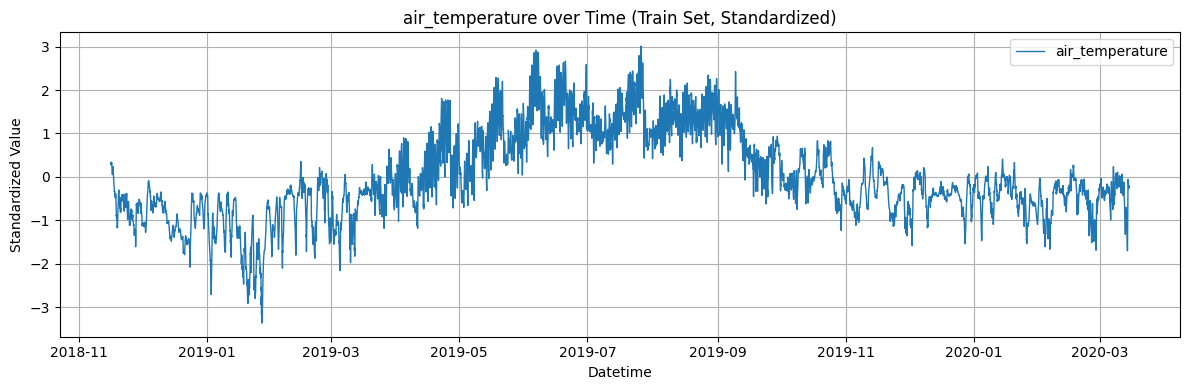

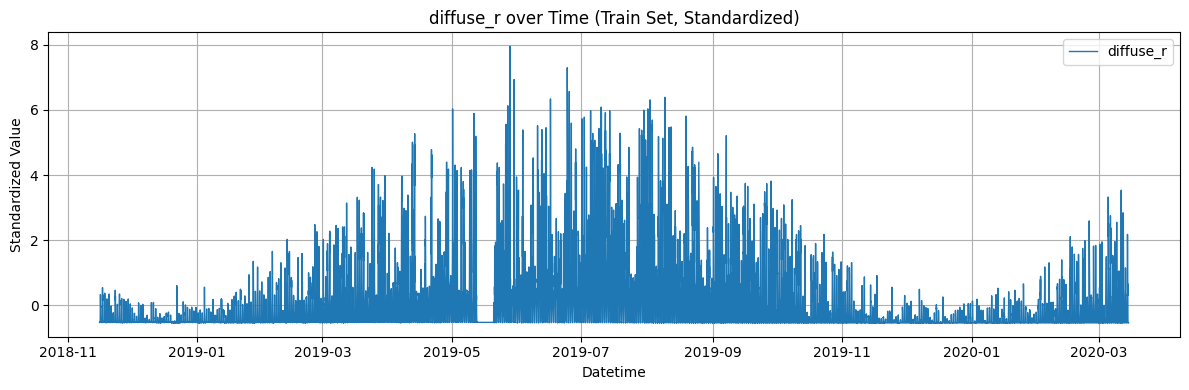

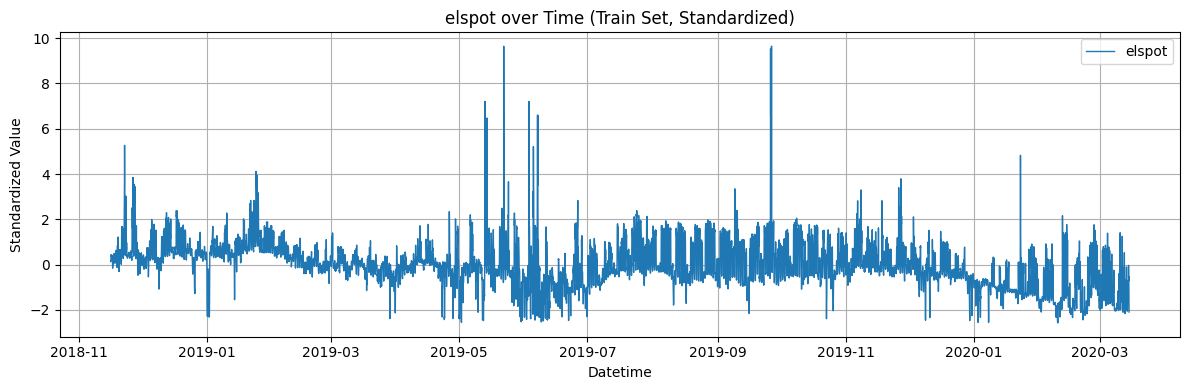

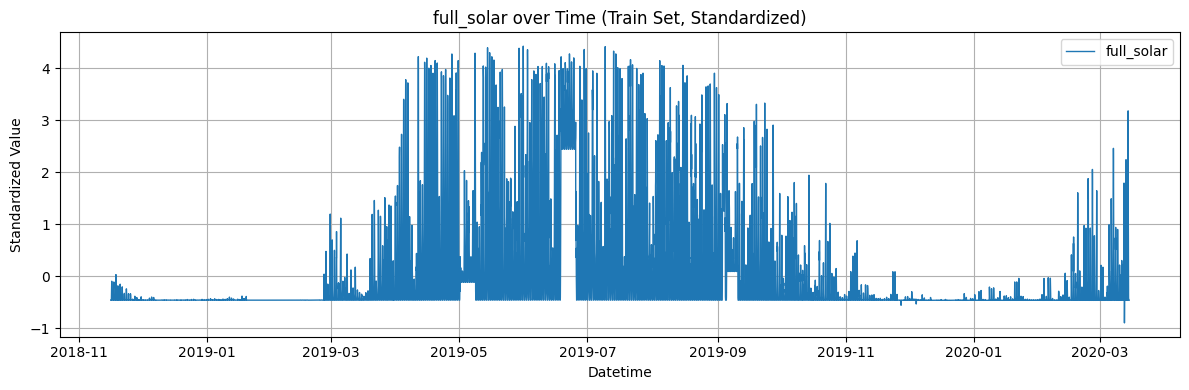

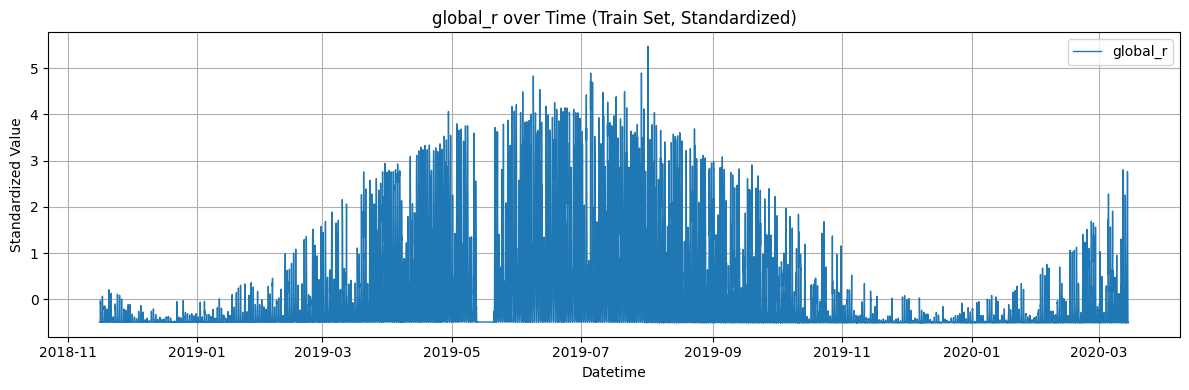

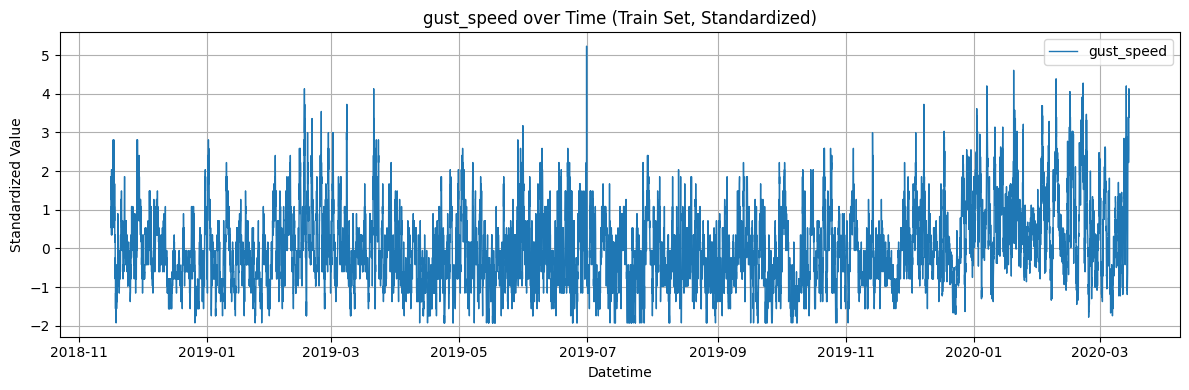

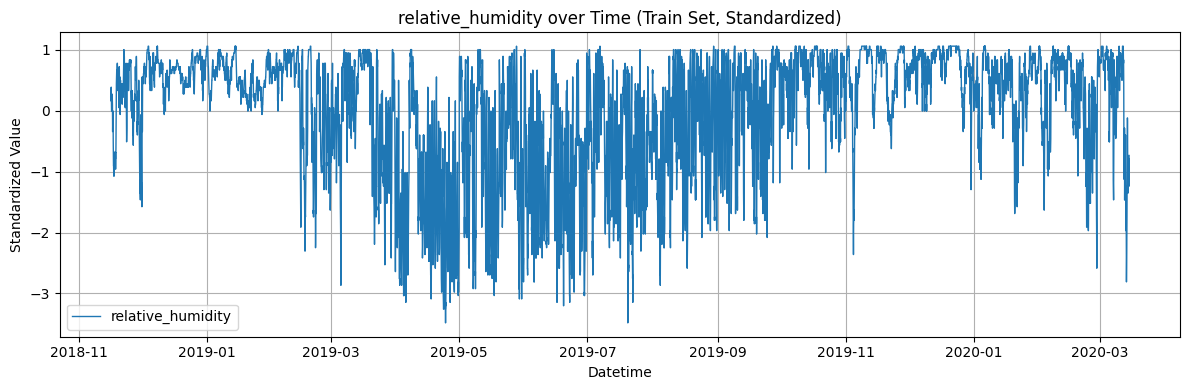

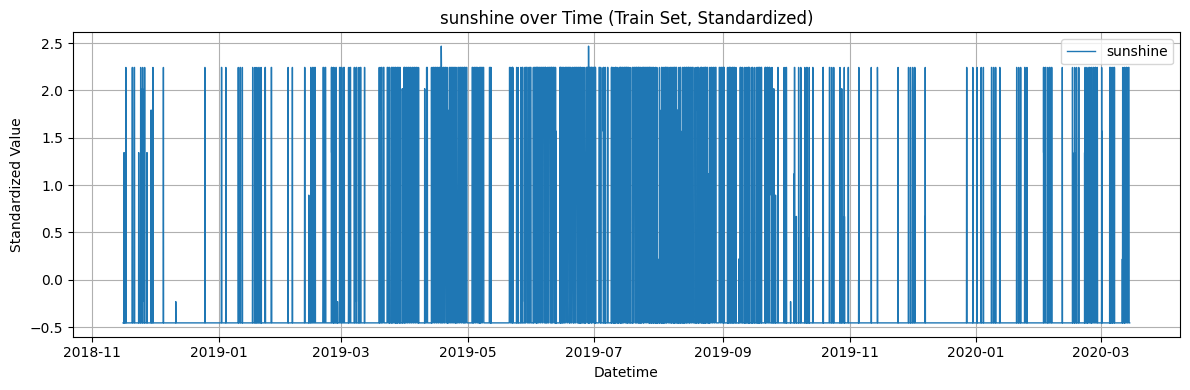

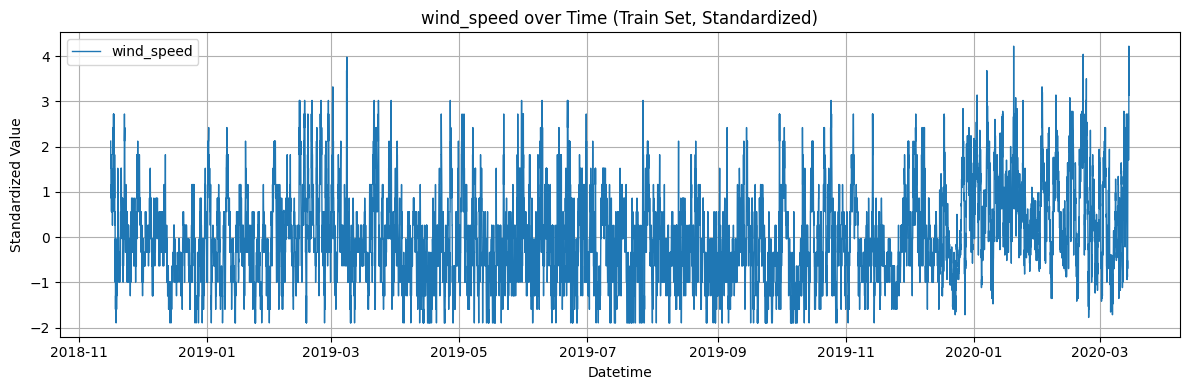

             datetime  energy  air_temperature  diffuse_r    elspot  \
0 2018-11-16 00:00:00   161.6         0.326873  -0.528883  0.149584   
1 2018-11-16 01:00:00   160.6         0.315406  -0.530350  0.127610   
2 2018-11-16 02:00:00   160.2         0.303940  -0.525950  0.136156   
3 2018-11-16 03:00:00   159.0         0.303940  -0.524483  0.164843   
4 2018-11-16 04:00:00   158.0         0.303940  -0.525950  0.274100   
5 2018-11-16 05:00:00   155.8         0.303940  -0.520083  0.333307   
6 2018-11-16 06:00:00   158.0         0.269541  -0.525950  0.415097   
7 2018-11-16 07:00:00   156.4         0.303940  -0.436479  0.440732   
8 2018-11-16 08:00:00   156.0         0.292474   0.205951  0.391902   
9 2018-11-16 09:00:00   150.2         0.326873   0.311556  0.357722   

   full_solar  global_r  gust_speed  relative_humidity  sunshine  wind_speed  
0   -0.456244 -0.491608    1.855847           0.218629 -0.455473    2.123126  
1   -0.456235 -0.491033    1.488741           0.162524 -0.45

In [13]:
import matplotlib.pyplot as plt

# List of features to plot
features_to_scale = [
    'air_temperature',
    'diffuse_r',
    'elspot',
    'full_solar',
    'global_r',
    'gust_speed',
    'relative_humidity',
    'sunshine',
    'wind_speed',
]

# Function to plot feature over time for a given dataset
def plot_features_over_time(df_scaled, dataset_name):
    for feature in features_to_scale:
        plt.figure(figsize=(12, 4))
        plt.plot(df_scaled['datetime'], df_scaled[feature], label=feature, linewidth=1)
        plt.title(f"{feature} over Time ({dataset_name}, Standardized)")
        plt.xlabel("Datetime")
        plt.ylabel("Standardized Value")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Plot for Train, Test, and Validation datasets
plot_features_over_time(X_train_scaled, "Train Set")
#plot_features_over_time(X_test_scaled, "Test Set")
#plot_features_over_time(X_val_scaled, "Validation Set")
# Show the first 10 rows of the standardized training data
# Add the 'energy' column from the original training data (not standardized)
X_train_scaled.insert(1, 'energy', df_Train['energy'].values)  # Insert after 'datetime'
# If you also want to do this for test and val:
X_test_scaled.insert(1, 'energy', df_Test['energy'].values)
X_val_scaled.insert(1, 'energy', df_Val['energy'].values)
print(X_train_scaled.head(10))


In [14]:
# Save the final standardized DataFrames with datetime and energy columns
X_train_scaled.to_excel("X_train_scaled.xlsx", index=False)
X_test_scaled.to_excel("X_test_scaled.xlsx", index=False)
X_val_scaled.to_excel("X_val_scaled.xlsx", index=False)

## *J) Innovation Droupout in the test data as well

# 21 June implementation

In [15]:
!pip install optuna

  Using cached tomli-2.2.1-py3-none-any.whl.metadata (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.2/582.2 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 751.2/751.2 kB 44.2 MB/s eta 0:00:00
Using cached tomli-2.2.1-py3-none-any.whl (14 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [optuna]2m8/9 [optuna]]my]


In [16]:
# Install Optuna

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models, optimizers, Input, callbacks
import tensorflow as tf
from datetime import timedelta
import optuna

# Load holiday dataset (assumed available in Colab environment)
holidays_df = pd.read_excel("3.Holydays .xlsx")
holidays_df['DateKEY'] = pd.to_datetime(holidays_df['DateKEY'], format='%Y%m%d')

# Feature engineering
def create_enhanced_features(df, holidays_df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['is_weekend'] = df['datetime'].dt.weekday.isin([5, 6]).astype(int)
    df['is_holiday'] = df['datetime'].dt.date.isin(holidays_df['DateKEY'].dt.date).astype(int)
    df['is_long_holiday'] = df['is_holiday'].rolling(window=7).sum().ffill()
    if 'air_temperature' in df.columns:
        df['avg_temperature'] = df['air_temperature'].rolling(window=7).mean().ffill()
        df['temp_lag1'] = df['air_temperature'].shift(1).ffill()
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday
    df['month'] = df['datetime'].dt.month
    df['is_peak_hour'] = df['hour'].isin([8, 9, 17, 18]).astype(int)
    df[selected_features] = df[selected_features].fillna(df[selected_features].mean())
    return df

selected_features = [
    'air_temperature', 'diffuse_r', 'elspot', 'full_solar', 'global_r',
    'gust_speed', 'relative_humidity', 'sunshine', 'wind_speed', 'hour', 'weekday',
    'month', 'is_weekend', 'is_holiday', 'is_long_holiday', 'avg_temperature',
    'temp_lag1', 'is_peak_hour'
]

# Apply feature engineering (assumed df_Train, df_Val, df_Test are pre-loaded)
df_Train = create_enhanced_features(df_Train, holidays_df)
df_Val = create_enhanced_features(df_Val, holidays_df)
df_Test = create_enhanced_features(df_Test, holidays_df)

# Normalize data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_full = scaler_X.fit_transform(df_Train[selected_features])
X_val_full = scaler_X.transform(df_Val[selected_features])
X_test_full = scaler_X.transform(df_Test[selected_features])
y_train_full = scaler_y.fit_transform(df_Train['energy'].values.reshape(-1, 1))
y_val_full = scaler_y.transform(df_Val['energy'].values.reshape(-1, 1))
y_test_full = scaler_y.transform(df_Test['energy'].values.reshape(-1, 1))

# TensorFlow dataset
def create_tf_dataset(X, y, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Sliding window for input and multi-step output
def create_sliding_windows(X_full, y_full, input_window, output_window):
    X, y = [], []
    for i in range(len(X_full) - input_window - output_window + 1):
        X.append(X_full[i:i + input_window])
        y.append(y_full[i + input_window:i + input_window + output_window].flatten())
    return np.array(X), np.array(y)

# Hyperparameters (initial values for Optuna)
input_window = 168  # 7 days
output_window = 168  # 7 days forecast
n_ensemble = 5
lstm_units = 100
dense_units = 20
learning_rate = 0.0005
epochs = 50
batch_size = 32

# Create windows
X_train, y_train = create_sliding_windows(X_train_full, y_train_full, input_window, output_window)
X_val, y_val = create_sliding_windows(X_val_full, y_val_full, input_window, output_window)
X_test, y_test = create_sliding_windows(X_test_full, y_test_full, input_window, output_window)
time_test = pd.Series(pd.to_datetime(df_Test['datetime'])[input_window + output_window - 1:])

X_train = X_train.reshape((-1, input_window, len(selected_features)))
X_val = X_val.reshape((-1, input_window, len(selected_features)))
X_test = X_test.reshape((-1, input_window, len(selected_features)))
y_train = y_train.reshape((-1, output_window))
y_val = y_val.reshape((-1, output_window))
y_test = y_test.reshape((-1, output_window))

train_dataset = create_tf_dataset(X_train, y_train)
val_dataset = create_tf_dataset(X_val, y_val)

# NLL loss with direct std modeling
@tf.function
def nll_loss(y_true, y_pred, lambda_reg=0.01):
    mu = y_pred[:, :, 0]
    std = tf.square(y_pred[:, :, 1])  # Direct std squared
    var = tf.clip_by_value(std, 1e-6, 1e6)  # Clip variance for stability
    nll = tf.reduce_mean(0.5 * (tf.math.log(var) + tf.square(y_true - mu) / var))
    reg = lambda_reg * tf.reduce_mean(std ** 2)  # Regularize std
    return nll + reg

# Encoder-Decoder LSTM model for multi-step output (updated signature)
def build_encoder_decoder_model(input_shape, output_steps, lstm_units=100, dense_units=20):
    inputs = Input(shape=input_shape)
    # Encoder
    encoder = layers.LSTM(lstm_units, return_sequences=True)(inputs)
    encoder = layers.LSTM(lstm_units // 2, return_sequences=False)(encoder)
    # Decoder
    repeated_context = layers.RepeatVector(output_steps)(encoder)
    decoder = layers.LSTM(lstm_units // 2, return_sequences=True)(repeated_context)
    decoder = layers.LSTM(lstm_units // 4, return_sequences=True)(decoder)
    # Output layer for mean and std
    outputs = layers.TimeDistributed(layers.Dense(2, kernel_initializer='glorot_normal',
                                                 bias_initializer=tf.keras.initializers.Constant(value=[0.0, 0.0])))(decoder)
    model = models.Model(inputs, outputs)
    model.compile(optimizer=optimizers.Adam(learning_rate), loss=lambda y_true, y_pred: nll_loss(y_true, y_pred))
    return model

# Optuna objective function
def objective(trial):
    lstm_units = trial.suggest_int('lstm_units', 50, 150, step=25)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-3, log=True)
    dense_units = trial.suggest_int('dense_units', 10, 30, step=5)
    lambda_reg = trial.suggest_float('lambda_reg', 0.001, 0.1, log=True)

    ensemble_models = []
    for _ in range(n_ensemble):
        model = build_encoder_decoder_model((input_window, len(selected_features)), output_window, lstm_units=lstm_units, dense_units=dense_units)
        history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs,
                            callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
                                       callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
                            verbose=0)
        ensemble_models.append(model)

    # Prediction and evaluation
    mean_pred, std_pred = predict_with_total_variance(ensemble_models, X_test)
    mean_pred = scaler_y.inverse_transform(mean_pred.reshape(-1, output_window)).reshape(-1)
    y_test_flat = scaler_y.inverse_transform(y_test.reshape(-1, output_window)).reshape(-1)
    std_pred = std_pred.reshape(-1) * scaler_y.scale_[0]
    mae = mean_absolute_error(y_test_flat, mean_pred)
    return mae  # Optimize for MAE

# Prediction with total variance for multi-step
def predict_with_total_variance(ensemble_models, X_test):
    preds = [model(X_test, training=False).numpy() for model in ensemble_models]
    mu_m = np.array([pred[:, :, 0] for pred in preds])  # (M, n_samples, output_steps)
    std_m = np.array([tf.square(pred[:, :, 1]).numpy() for pred in preds])  # Squared std
    mean_mu = np.mean(mu_m, axis=0)
    mean_var = np.mean(std_m, axis=0)
    var_between = np.var(mu_m, axis=0)
    total_var = mean_var + var_between
    std = np.sqrt(np.clip(total_var, 1e-6, 1e6))
    return mean_mu, std

# Baseline: 7-day average forecast
def baseline_7day_average(X_full, y_full, input_window, output_window):
    X, y = [], []
    for i in range(len(X_full) - input_window - output_window + 1):
        past_7d = y_full[i + input_window - 168:i + input_window].mean()  # Average of last 7 days
        y_pred = np.full(output_window, past_7d)
        X.append(X_full[i:i + input_window])
        y.append(y_full[i + input_window:i + input_window + output_window].flatten())
    return np.array(X), np.array(y_pred)

# Generate baseline predictions
_, baseline_pred = baseline_7day_average(X_test_full, y_test_full, input_window, output_window)
baseline_pred = scaler_y.inverse_transform(baseline_pred.reshape(-1, output_window)).reshape(-1)
y_test_flat = scaler_y.inverse_transform(y_test.reshape(-1, output_window)).reshape(-1)

# Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)  # Limited trials for Colab runtime

# Train best model based on Optuna results
best_params = study.best_params
best_lstm_units = best_params['lstm_units']
best_learning_rate = best_params['learning_rate']
best_dense_units = best_params['dense_units']
best_lambda_reg = best_params['lambda_reg']

ensemble_models = []
for _ in range(n_ensemble):
    model = build_encoder_decoder_model((input_window, len(selected_features)), output_window, lstm_units=best_lstm_units, dense_units=best_dense_units)
    model.fit(train_dataset, validation_data=val_dataset, epochs=epochs,
              callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
                         callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
              verbose=1)
    ensemble_models.append(model)

# Final predictions
mean_pred, std_pred = predict_with_total_variance(ensemble_models, X_test)
mean_pred = scaler_y.inverse_transform(mean_pred.reshape(-1, output_window)).reshape(-1)
std_pred = std_pred.reshape(-1) * scaler_y.scale_[0]
total_var = std_pred ** 2

# Evaluation
mae = mean_absolute_error(y_test_flat, mean_pred)
rmse = np.sqrt(mean_squared_error(y_test_flat, mean_pred))
nll = np.mean(0.5 * (np.log(total_var) + (y_test_flat - mean_pred)**2 / total_var) + 0.5 * np.log(2 * np.pi))
baseline_mae = mean_absolute_error(y_test_flat, baseline_pred)
baseline_rmse = np.sqrt(mean_squared_error(y_test_flat, baseline_pred))

print(f"Model MAE: {mae:.2f}")
print(f"Model RMSE: {rmse:.2f}")
print(f"Model NLL: {nll:.2f}")
print(f"Baseline MAE (7-day avg): {baseline_mae:.2f}")
print(f"Baseline RMSE (7-day avg): {baseline_rmse:.2f}")

# Plot 7-day forecast
week_indices = range(output_window)
plt.figure(figsize=(15, 5))
plt.plot(week_indices, y_test_flat[:output_window], label="True Energy", alpha=0.6)
plt.plot(week_indices, mean_pred[:output_window], label="Predicted Mean", alpha=0.9)
plt.plot(week_indices, baseline_pred[:output_window], label="Baseline (7-day avg)", alpha=0.7, linestyle='--')
plt.fill_between(week_indices,
                 mean_pred[:output_window] - 1.96 * std_pred[:output_window],
                 mean_pred[:output_window] + 1.96 * std_pred[:output_window],
                 color='orange', alpha=0.3, label="95% CI")
plt.title("Forecast for 7 Days (Encoder-Decoder LSTM Ensemble)")
plt.xlabel("Hours")
plt.ylabel("Energy")
plt.xticks(range(0, 169, 24), rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

2025-06-22 19:09:19.403558: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750608559.425413   52429 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750608559.432680   52429 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750608559.449716   52429 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750608559.449734   52429 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750608559.449736   52429 computation_placer.cc:177] computation placer alr

Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - loss: 1089.7837 - val_loss: 392.1755 - learning_rate: 5.0000e-04
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 198.0165 - val_loss: 199.3659 - learning_rate: 5.0000e-04
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 261.6498 - val_loss: 302.2304 - learning_rate: 5.0000e-04
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 284.0886 - val_loss: 59.9343 - learning_rate: 5.0000e-04
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 80.7740 - val_loss: 10.3469 - learning_rate: 5.0000e-04
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 31.7236 - val_loss: 20.7853 - learning_rate: 5.0000e-04
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 15.3835 - val_loss: 35.3413 - learning_rate: 5.0000e-04
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - loss: 11.5519 - val_loss: 25.0567 - learning_rate: 5.0000e-04
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms

ValueError: Found input variables with inconsistent numbers of samples: [314664, 168]


🧮 Baseline Evaluation (7-day average):
MAE:  52.29
RMSE: 59.62


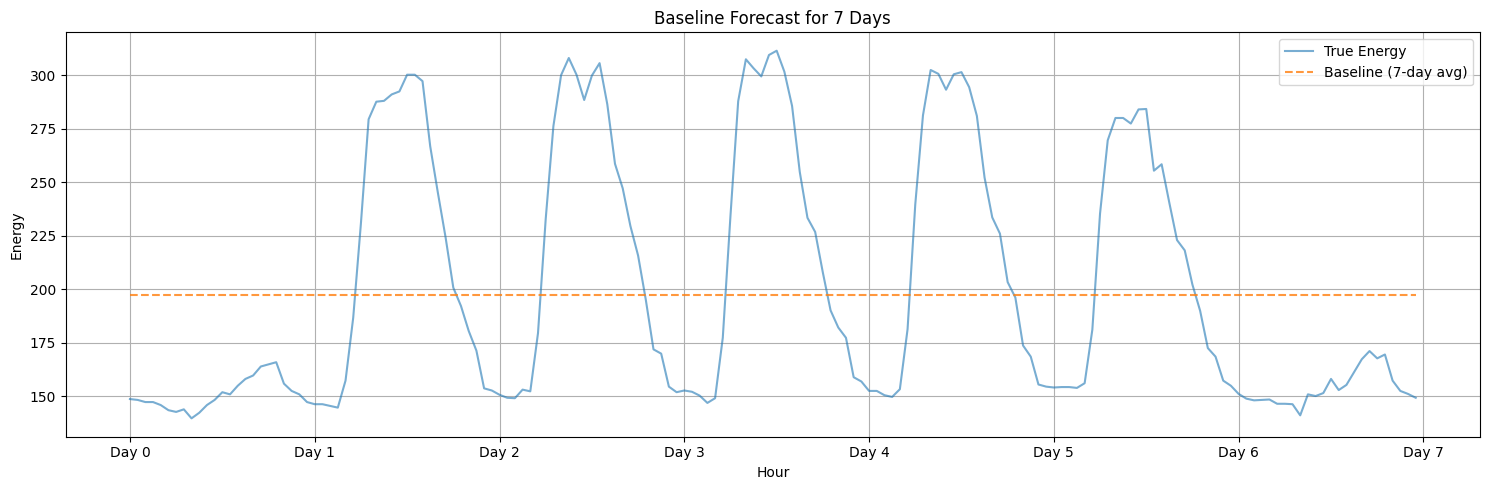

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# --- Parameters ---
input_window = 168  # 7 days
output_window = 168  # forecast for the next 7 days

# --- Required columns ---
selected_features = [
    'air_temperature', 'diffuse_r', 'elspot', 'full_solar', 'global_r',
    'gust_speed', 'relative_humidity', 'sunshine', 'wind_speed', 'hour', 'weekday',
    'month', 'is_weekend', 'is_holiday', 'is_long_holiday', 'avg_temperature',
    'temp_lag1', 'is_peak_hour'
]

# --- Load data ---
df_Test = pd.read_excel("X_test_scaled.xlsx")
holidays_df = pd.read_excel("3.Holydays .xlsx")
holidays_df['DateKEY'] = pd.to_datetime(holidays_df['DateKEY'], format='%Y%m%d')

# --- Feature engineering ---
def create_enhanced_features(df, holidays_df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['is_weekend'] = df['datetime'].dt.weekday.isin([5, 6]).astype(int)
    df['is_holiday'] = df['datetime'].dt.date.isin(holidays_df['DateKEY'].dt.date).astype(int)
    df['is_long_holiday'] = df['is_holiday'].rolling(window=7).sum().ffill()
    if 'air_temperature' in df.columns:
        df['avg_temperature'] = df['air_temperature'].rolling(window=7).mean().ffill()
        df['temp_lag1'] = df['air_temperature'].shift(1).ffill()
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday
    df['month'] = df['datetime'].dt.month
    df['is_peak_hour'] = df['hour'].isin([8, 9, 17, 18]).astype(int)
    df[selected_features] = df[selected_features].fillna(df[selected_features].mean())
    return df

df_Test = create_enhanced_features(df_Test, holidays_df)

# --- Normalize target variable ---
scaler_y = StandardScaler()
scaler_y.fit(df_Test['energy'].values.reshape(-1, 1))

# --- Final test data ---
X_test_full = df_Test[selected_features].values
y_test_full = df_Test['energy'].values.reshape(-1, 1)
y_test_full_scaled = scaler_y.transform(y_test_full)

# --- Sliding window for baseline forecast ---
def baseline_7day_average(X_full, y_full, input_window, output_window):
    preds = []
    targets = []
    for i in range(len(y_full) - input_window - output_window + 1):
        past_7d = y_full[i + input_window - 168:i + input_window].mean()
        pred = np.full(output_window, past_7d)
        true = y_full[i + input_window:i + input_window + output_window].flatten()
        preds.append(pred)
        targets.append(true)
    return np.array(preds), np.array(targets)

baseline_pred, y_test = baseline_7day_average(X_test_full, y_test_full_scaled, input_window, output_window)

# --- Inverse transform to original scale ---
baseline_pred_inv = scaler_y.inverse_transform(baseline_pred.reshape(-1, 1)).reshape(-1)
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

# --- Evaluation ---
mae = mean_absolute_error(y_test_inv, baseline_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, baseline_pred_inv))

print("\n🧮 Baseline Evaluation (7-day average):")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# --- Plot sample output ---
steps = output_window
plt.figure(figsize=(15, 5))
plt.plot(y_test_inv[:steps], label="True Energy", alpha=0.6)
plt.plot(baseline_pred_inv[:steps], label="Baseline (7-day avg)", linestyle='--', alpha=0.8)
plt.title("Baseline Forecast for 7 Days")
plt.xlabel("Hour")
plt.ylabel("Energy")
plt.xticks(range(0, steps+1, 24), labels=[f"Day {i}" for i in range(steps // 24 + 1)])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 32s 62ms/step - loss: 7874.0137 - val_loss: 2028.5447 - learning_rate: 8.5750e-05
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 1618.0043 - val_loss: 318.2475 - learning_rate: 8.5750e-05
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 264.3060 - val_loss: 306.1454 - learning_rate: 8.5750e-05
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 232.1446 - val_loss: 83.9809 - learning_rate: 8.5750e-05
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 84.5945 - val_loss: 26.0618 - learning_rate: 8.5750e-05
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - loss: 33.5750 - val_loss: 25.4819 - learning_rate: 8.5750e-05
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 33.0101 - val_loss: 24.6893 - learning_rate: 8.5750e-05
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - loss: 32.3792 - val_loss: 23.5586 - learning_rate: 8.5750e-05
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 20s 58

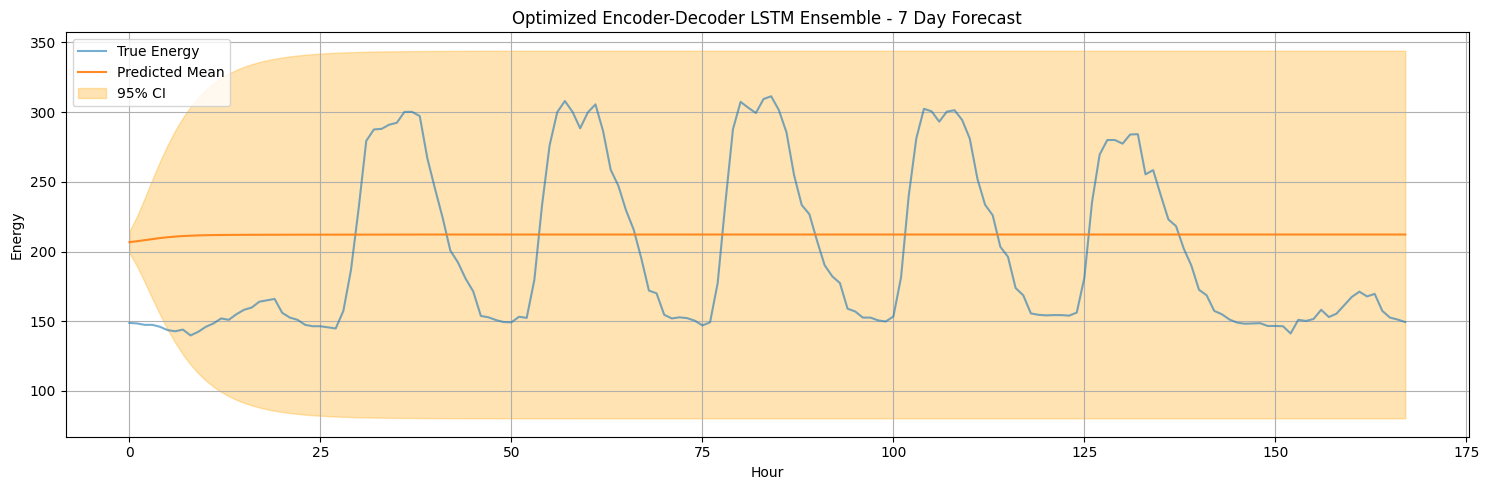

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models, Input

# --- Load datasets ---
df_Test = pd.read_excel("X_test_scaled.xlsx")
df_Train = pd.read_excel("X_train_scaled.xlsx")
df_Val = pd.read_excel("X_val_scaled.xlsx")
holidays_df = pd.read_excel("3.Holydays .xlsx")
holidays_df['DateKEY'] = pd.to_datetime(holidays_df['DateKEY'], format='%Y%m%d')

# --- Feature Engineering ---
selected_features = [
    'air_temperature', 'diffuse_r', 'elspot', 'full_solar', 'global_r',
    'gust_speed', 'relative_humidity', 'sunshine', 'wind_speed', 'hour', 'weekday',
    'month', 'is_weekend', 'is_holiday', 'is_long_holiday', 'avg_temperature',
    'temp_lag1', 'is_peak_hour'
]

def create_enhanced_features(df, holidays_df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['is_weekend'] = df['datetime'].dt.weekday.isin([5, 6]).astype(int)
    df['is_holiday'] = df['datetime'].dt.date.isin(holidays_df['DateKEY'].dt.date).astype(int)
    df['is_long_holiday'] = df['is_holiday'].rolling(window=7).sum().ffill()
    df['avg_temperature'] = df['air_temperature'].rolling(window=7).mean().ffill()
    df['temp_lag1'] = df['air_temperature'].shift(1).ffill()
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday
    df['month'] = df['datetime'].dt.month
    df['is_peak_hour'] = df['hour'].isin([8, 9, 17, 18]).astype(int)
    df[selected_features] = df[selected_features].fillna(df[selected_features].mean())
    return df

df_Train = create_enhanced_features(df_Train, holidays_df)
df_Val = create_enhanced_features(df_Val, holidays_df)
df_Test = create_enhanced_features(df_Test, holidays_df)

# --- Normalization ---
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_full = scaler_X.fit_transform(df_Train[selected_features])
X_val_full = scaler_X.transform(df_Val[selected_features])
X_test_full = scaler_X.transform(df_Test[selected_features])
y_train_full = scaler_y.fit_transform(df_Train['energy'].values.reshape(-1, 1))
y_val_full = scaler_y.transform(df_Val['energy'].values.reshape(-1, 1))
y_test_full = scaler_y.transform(df_Test['energy'].values.reshape(-1, 1))

# --- Sliding Windows ---
def create_sliding_windows(X, y, input_window, output_window):
    Xs, ys = [], []
    for i in range(len(X) - input_window - output_window + 1):
        Xs.append(X[i:i + input_window])
        ys.append(y[i + input_window:i + input_window + output_window].flatten())
    return np.array(Xs), np.array(ys)

input_window = 168
output_window = 168
X_train, y_train = create_sliding_windows(X_train_full, y_train_full, input_window, output_window)
X_val, y_val = create_sliding_windows(X_val_full, y_val_full, input_window, output_window)
X_test, y_test = create_sliding_windows(X_test_full, y_test_full, input_window, output_window)

# --- TF Dataset ---
def create_tf_dataset(X, y, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_dataset = create_tf_dataset(X_train, y_train)
val_dataset = create_tf_dataset(X_val, y_val)

# --- NLL Loss ---
@tf.function
def nll_loss(y_true, y_pred):
    mu = y_pred[:, :, 0]
    std = tf.square(y_pred[:, :, 1])
    var = tf.clip_by_value(std, 1e-6, 1e6)
    nll = tf.reduce_mean(0.5 * (tf.math.log(var) + tf.square(y_true - mu) / var))
    reg = 0.00141495 * tf.reduce_mean(std ** 2)  # Best lambda_reg
    return nll + reg

# --- Model Architecture ---
def build_encoder_decoder_model(input_shape, output_steps):
    inputs = Input(shape=input_shape)
    x = layers.LSTM(125, return_sequences=True)(inputs)
    x = layers.LSTM(62, return_sequences=False)(x)
    x = layers.RepeatVector(output_steps)(x)
    x = layers.LSTM(62, return_sequences=True)(x)
    x = layers.LSTM(31, return_sequences=True)(x)
    outputs = layers.TimeDistributed(layers.Dense(2, kernel_initializer='glorot_normal',
                         bias_initializer=tf.keras.initializers.Constant(value=[0.0, 0.0])))(x)
    model = models.Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=8.575e-5),
                  loss=nll_loss)
    return model

# --- Train Ensemble ---
n_ensemble = 5
ensemble_models = []
for i in range(n_ensemble):
    model = build_encoder_decoder_model((input_window, len(selected_features)), output_window)
    model.fit(train_dataset, validation_data=val_dataset, epochs=50, verbose=1,
              callbacks=[
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5),
                  tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
              ])
    ensemble_models.append(model)

# --- Prediction ---
def predict_with_total_variance(ensemble_models, X):
    preds = [model(X, training=False).numpy() for model in ensemble_models]
    mu_m = np.array([pred[:, :, 0] for pred in preds])
    std_m = np.array([tf.square(pred[:, :, 1]).numpy() for pred in preds])
    mean_mu = np.mean(mu_m, axis=0)
    mean_var = np.mean(std_m, axis=0)
    var_between = np.var(mu_m, axis=0)
    total_var = mean_var + var_between
    std = np.sqrt(np.clip(total_var, 1e-6, 1e6))
    return mean_mu, std

mean_pred, std_pred = predict_with_total_variance(ensemble_models, X_test)
mean_pred = scaler_y.inverse_transform(mean_pred.reshape(-1, output_window)).reshape(-1)
y_test_flat = scaler_y.inverse_transform(y_test.reshape(-1, output_window)).reshape(-1)
std_pred = std_pred.reshape(-1) * scaler_y.scale_[0]
total_var = std_pred ** 2

# --- Evaluation ---
mae = mean_absolute_error(y_test_flat, mean_pred)
rmse = np.sqrt(mean_squared_error(y_test_flat, mean_pred))
nll = np.mean(0.5 * (np.log(total_var) + ((y_test_flat - mean_pred) ** 2) / total_var) + 0.5 * np.log(2 * np.pi))

print("\n📊 Final Evaluation (Optimized Model)")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"NLL:  {nll:.2f}")

# --- Plot 7-day sample ---
plt.figure(figsize=(15, 5))
plt.plot(y_test_flat[:168], label="True Energy", alpha=0.6)
plt.plot(mean_pred[:168], label="Predicted Mean", alpha=0.9)
plt.fill_between(range(168),
                 mean_pred[:168] - 1.96 * std_pred[:168],
                 mean_pred[:168] + 1.96 * std_pred[:168],
                 color='orange', alpha=0.3, label="95% CI")
plt.title("Optimized Encoder-Decoder LSTM Ensemble - 7 Day Forecast")
plt.xlabel("Hour")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - loss: 7.8812 - val_loss: 1.3209 - learning_rate: 8.5750e-05
Epoch 2/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.7634 - val_loss: 0.5553 - learning_rate: 8.5750e-05
Epoch 3/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.4986 - val_loss: 0.5367 - learning_rate: 8.5750e-05
Epoch 4/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.4952 - val_loss: 0.5349 - learning_rate: 8.5750e-05
Epoch 5/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.4955 - val_loss: 0.5345 - learning_rate: 8.5750e-05
Epoch 6/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.4956 - val_loss: 0.5342 - learning_rate: 8.5750e-05
Epoch 7/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.4957 - val_loss: 0.5338 - learning_rate: 8.5750e-05
Epoch 8/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.4956 - val_loss: 0.5334 - learning_rate: 8.5750e-05
Epoch 9/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.4954 - v

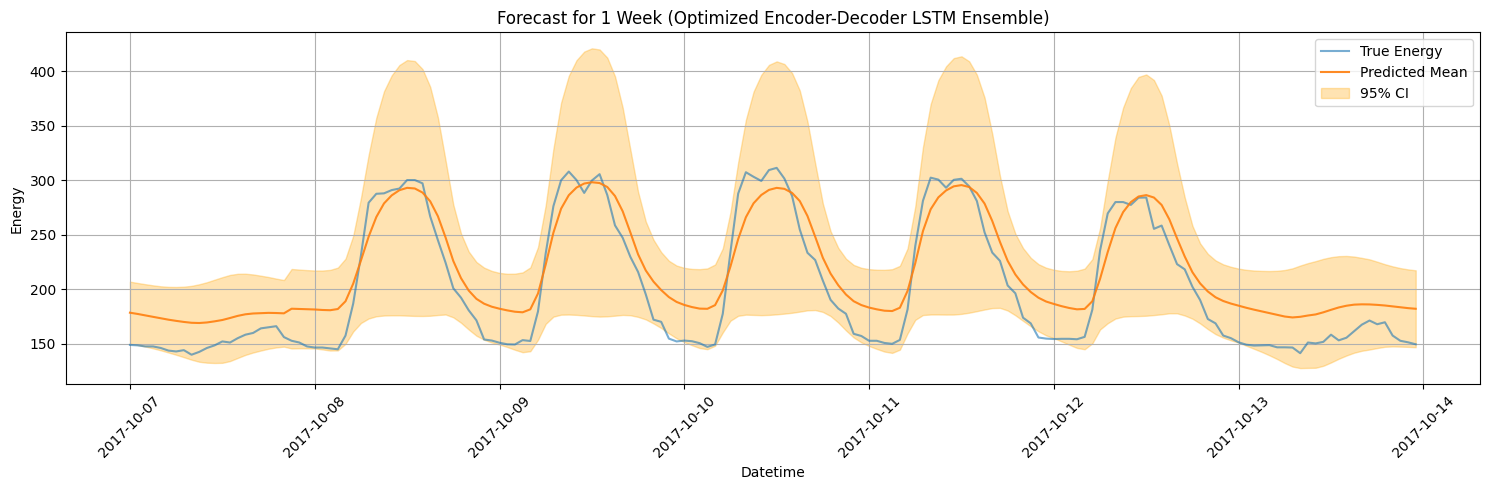

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, Input, callbacks
import tensorflow as tf
from datetime import timedelta

# --- Best Hyperparameters from Optuna ---
lstm_units = 125
learning_rate = 8.575027770348701e-05
dense_units = 25
lambda_reg = 0.001415
window_size = 168
n_ensemble = 5
epochs = 50
batch_size = 32

# --- Load holiday dataset ---
holidays_df = pd.read_excel("3.Holydays .xlsx")
holidays_df['DateKEY'] = pd.to_datetime(holidays_df['DateKEY'], format='%Y%m%d')

# --- Feature engineering ---
def create_enhanced_features(df, holidays_df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['is_weekend'] = df['datetime'].dt.weekday.isin([5, 6]).astype(int)
    df['is_holiday'] = df['datetime'].dt.date.isin(holidays_df['DateKEY'].dt.date).astype(int)
    df['is_long_holiday'] = df['is_holiday'].rolling(window=7).sum().ffill()
    if 'air_temperature' in df.columns:
        df['avg_temperature'] = df['air_temperature'].rolling(window=7).mean().ffill()
        df['temp_lag1'] = df['air_temperature'].shift(1).ffill()
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday
    df['month'] = df['datetime'].dt.month
    df['is_peak_hour'] = df['hour'].isin([8, 9, 17, 18]).astype(int)
    df[selected_features] = df[selected_features].fillna(df[selected_features].mean())
    return df

# --- Selected features ---
selected_features = [
    'air_temperature', 'diffuse_r', 'elspot', 'full_solar', 'global_r',
    'gust_speed', 'relative_humidity', 'sunshine', 'wind_speed', 'hour', 'weekday',
    'month', 'is_weekend', 'is_holiday', 'is_long_holiday', 'avg_temperature',
    'temp_lag1', 'is_peak_hour']

# --- Apply to datasets ---
df_Train = create_enhanced_features(df_Train, holidays_df)
df_Val = create_enhanced_features(df_Val, holidays_df)
df_Test = create_enhanced_features(df_Test, holidays_df)

# --- Normalize data ---
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_full = scaler_X.fit_transform(df_Train[selected_features])
X_val_full = scaler_X.transform(df_Val[selected_features])
X_test_full = scaler_X.transform(df_Test[selected_features])
y_train_full = scaler_y.fit_transform(df_Train['energy'].values.reshape(-1, 1))
y_val_full = scaler_y.transform(df_Val['energy'].values.reshape(-1, 1))
y_test_full = scaler_y.transform(df_Test['energy'].values.reshape(-1, 1))

# --- TensorFlow dataset creation ---
def create_tf_dataset(X, y, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# --- Sliding window ---
def create_sliding_windows(X_full, y_full, window_size):
    X, y = [], []
    for i in range(len(X_full) - window_size):
        X.append(X_full[i:i + window_size])
        y.append(y_full[i + window_size])
    return np.array(X), np.array(y)

X_train, y_train = create_sliding_windows(X_train_full, y_train_full, window_size)
X_val, y_val = create_sliding_windows(X_val_full, y_val_full, window_size)
X_test, y_test = create_sliding_windows(X_test_full, y_test_full, window_size)
time_test = pd.Series(pd.to_datetime(df_Test['datetime'])[window_size:])

X_train = X_train.reshape((-1, window_size, len(selected_features)))
X_val = X_val.reshape((-1, window_size, len(selected_features)))
X_test = X_test.reshape((-1, window_size, len(selected_features)))
y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()

train_dataset = create_tf_dataset(X_train, y_train)
val_dataset = create_tf_dataset(X_val, y_val)

# --- NLL loss with regularization ---
@tf.function
def nll_loss(y_true, y_pred):
    mu = y_pred[:, 0]
    log_var = y_pred[:, 1]
    var = tf.nn.softplus(log_var) + 1e-6
    nll = tf.reduce_mean(0.5 * (tf.math.log(var) + tf.square(y_true - mu) / var))
    reg = lambda_reg * tf.reduce_mean(log_var ** 2)
    return nll + reg

# --- Model architecture ---
def build_encoder_decoder_model(input_shape):
    inputs = Input(shape=input_shape)
    encoder = layers.LSTM(lstm_units, return_sequences=True)(inputs)
    encoder = layers.LSTM(lstm_units // 2, return_sequences=False)(encoder)
    repeated_context = layers.RepeatVector(1)(encoder)
    decoder = layers.LSTM(lstm_units // 2, return_sequences=True)(repeated_context)
    decoder = layers.LSTM(lstm_units // 4)(decoder)
    x = layers.Dense(dense_units, activation='relu')(decoder)
    outputs = layers.Dense(2, kernel_initializer='glorot_normal',
                           bias_initializer=tf.keras.initializers.Constant(value=[0.0, -3.0]))(x)
    model = models.Model(inputs, outputs)
    model.compile(optimizer=optimizers.Adam(learning_rate), loss=nll_loss)
    return model

# --- Callbacks ---
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# --- Train ensemble ---
ensemble_models = []
for _ in range(n_ensemble):
    model = build_encoder_decoder_model((window_size, len(selected_features)))
    model.fit(train_dataset, validation_data=val_dataset, epochs=epochs,
              callbacks=[lr_scheduler, early_stopping], verbose=1)
    ensemble_models.append(model)

# --- Prediction ---
def predict_with_total_variance(ensemble_models, X_test):
    preds = [model(X_test, training=False).numpy() for model in ensemble_models]
    mu_m = np.array([pred[:, 0] for pred in preds])
    log_var_m = np.array([pred[:, 1] for pred in preds])
    var_m = tf.nn.softplus(log_var_m) + 1e-6
    mean_mu = np.mean(mu_m, axis=0)
    mean_var = np.mean(var_m, axis=0)
    var_between = np.var(mu_m, axis=0)
    total_var = mean_var + var_between
    std = np.sqrt(total_var)
    return mean_mu, std

mean_pred, std_pred = predict_with_total_variance(ensemble_models, X_test)

# --- Inverse transform ---
mean_pred = scaler_y.inverse_transform(mean_pred.reshape(-1, 1)).ravel()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
std_pred = std_pred * scaler_y.scale_[0]
total_var = std_pred ** 2

# --- Evaluation ---
mae = mean_absolute_error(y_test, mean_pred)
rmse = np.sqrt(mean_squared_error(y_test, mean_pred))
nll = np.mean(0.5 * (np.log(total_var) + (y_test - mean_pred)**2 / total_var) + 0.5 * np.log(2 * np.pi))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"NLL: {nll:.2f}")

# --- Plot ---
week_indices = (time_test >= time_test.iloc[0]) & (time_test < time_test.iloc[0] + timedelta(weeks=1))
plt.figure(figsize=(15, 5))
plt.plot(time_test[week_indices], y_test[week_indices], label="True Energy", alpha=0.6)
plt.plot(time_test[week_indices], mean_pred[week_indices], label="Predicted Mean", alpha=0.9)
plt.fill_between(time_test[week_indices],
                 mean_pred[week_indices] - 1.96 * std_pred[week_indices],
                 mean_pred[week_indices] + 1.96 * std_pred[week_indices],
                 color='orange', alpha=0.3, label="95% CI")
plt.title("Forecast for 1 Week (Optimized Encoder-Decoder LSTM Ensemble)")
plt.xlabel("Datetime")
plt.ylabel("Energy")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


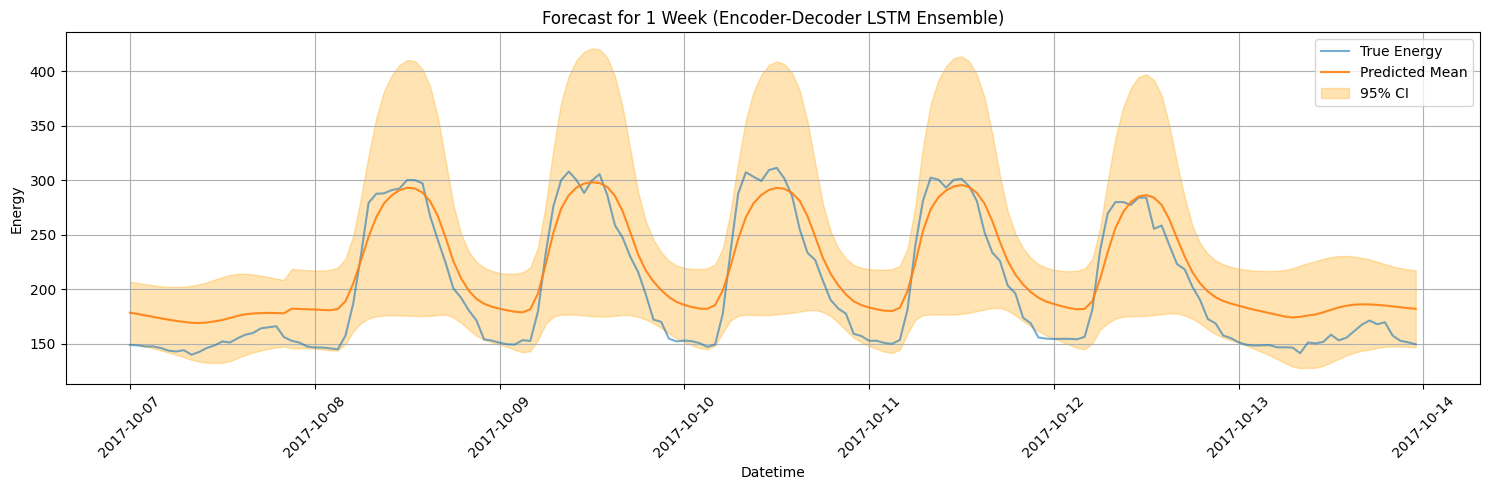

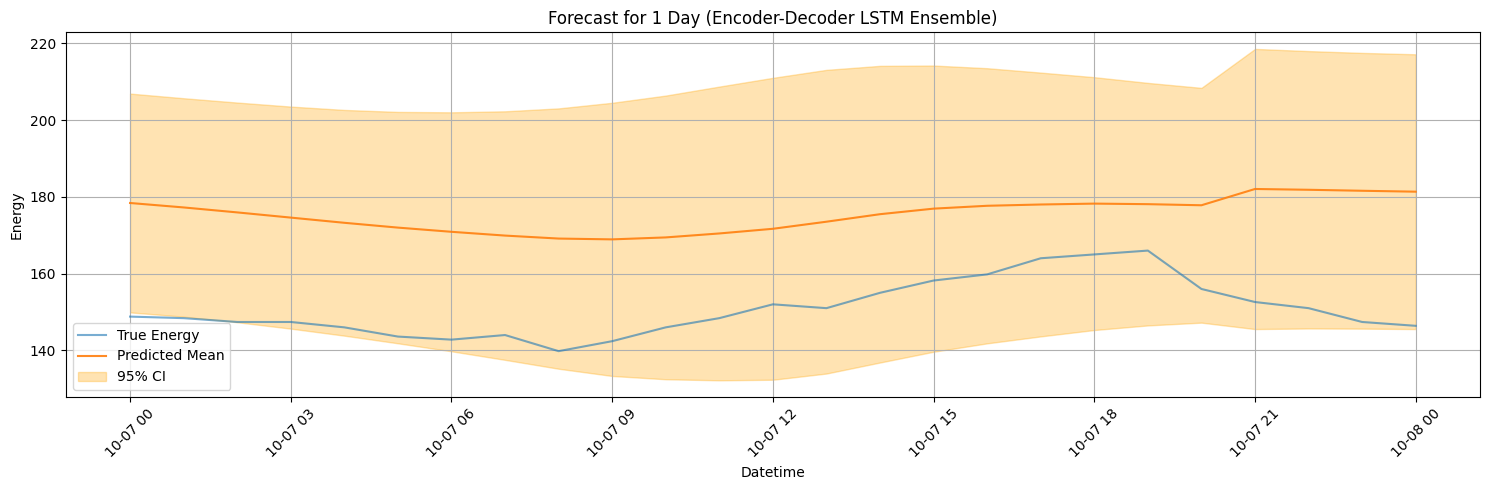

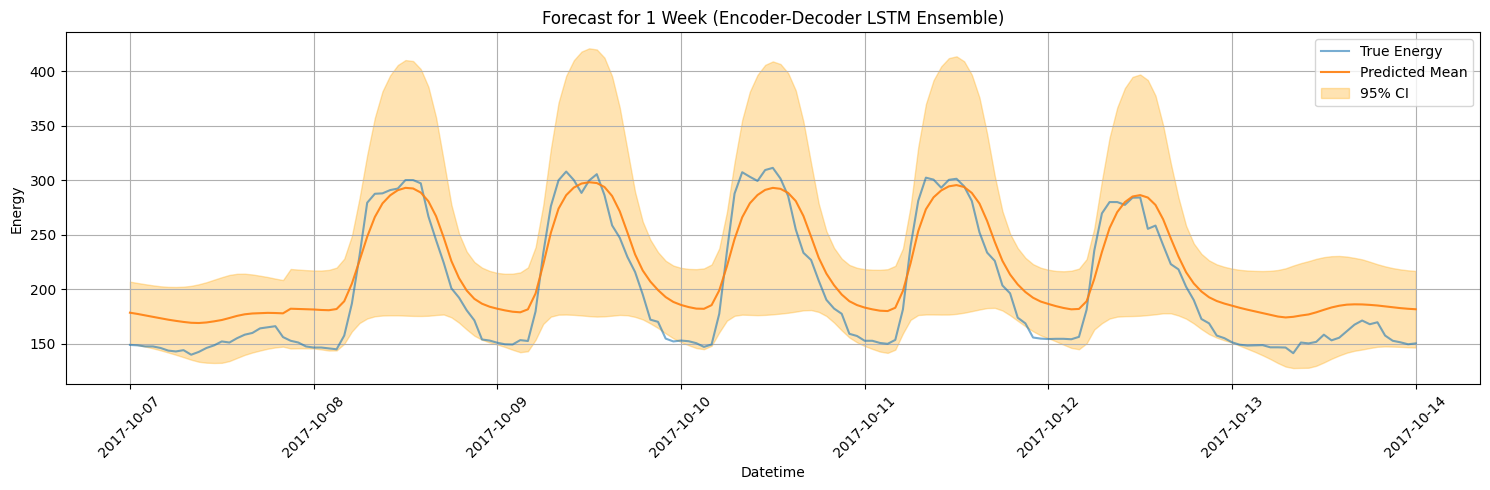

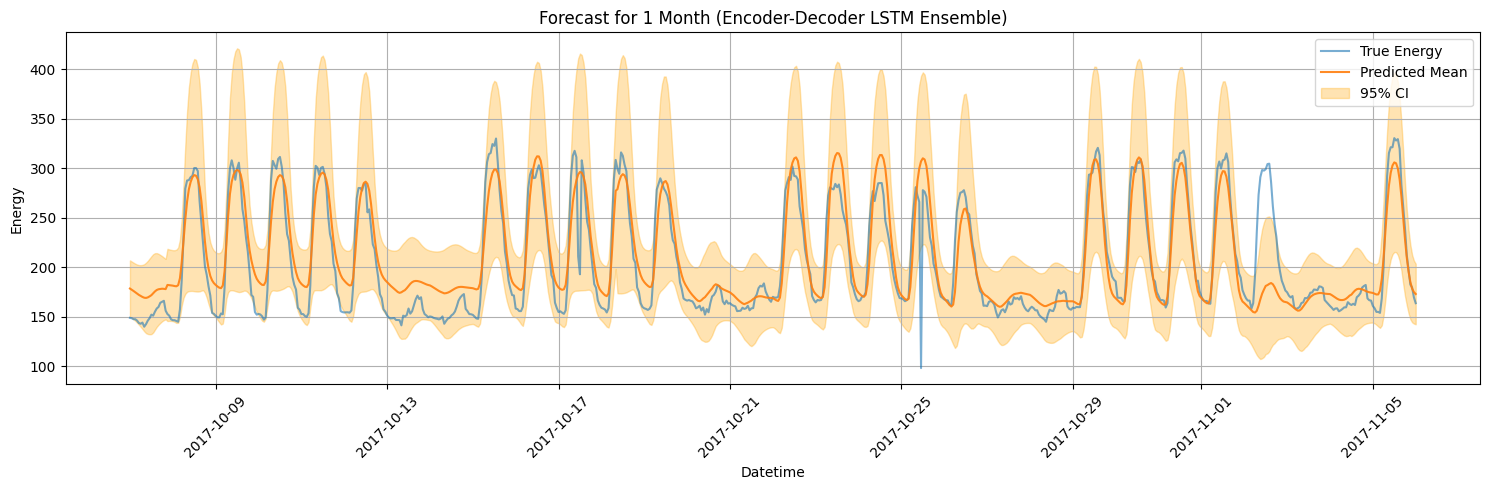

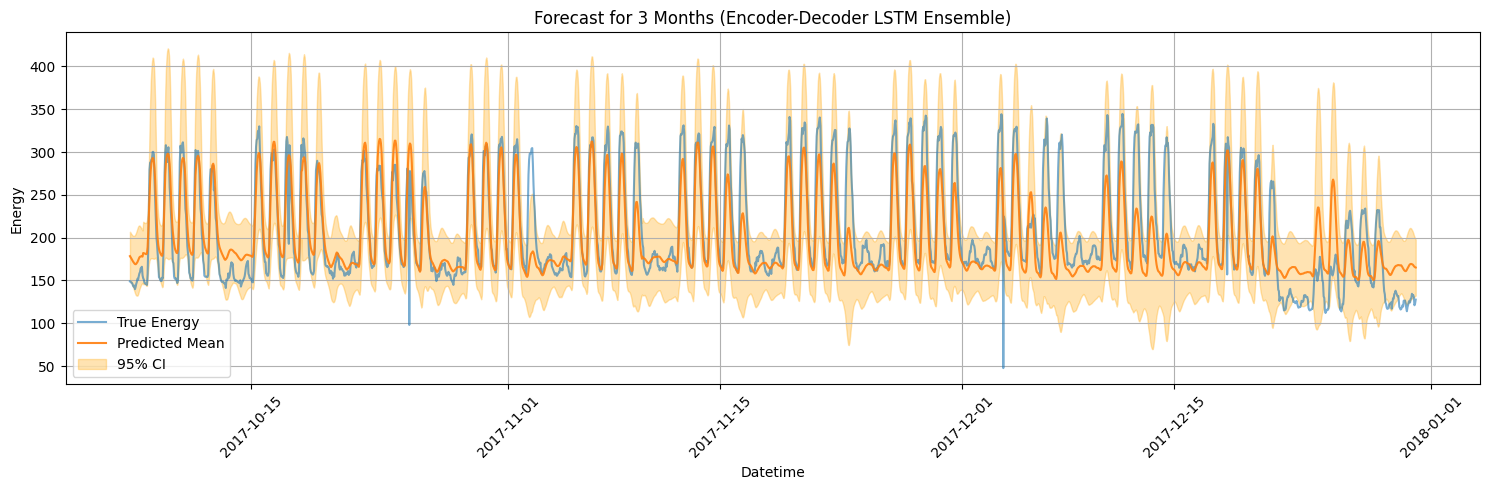

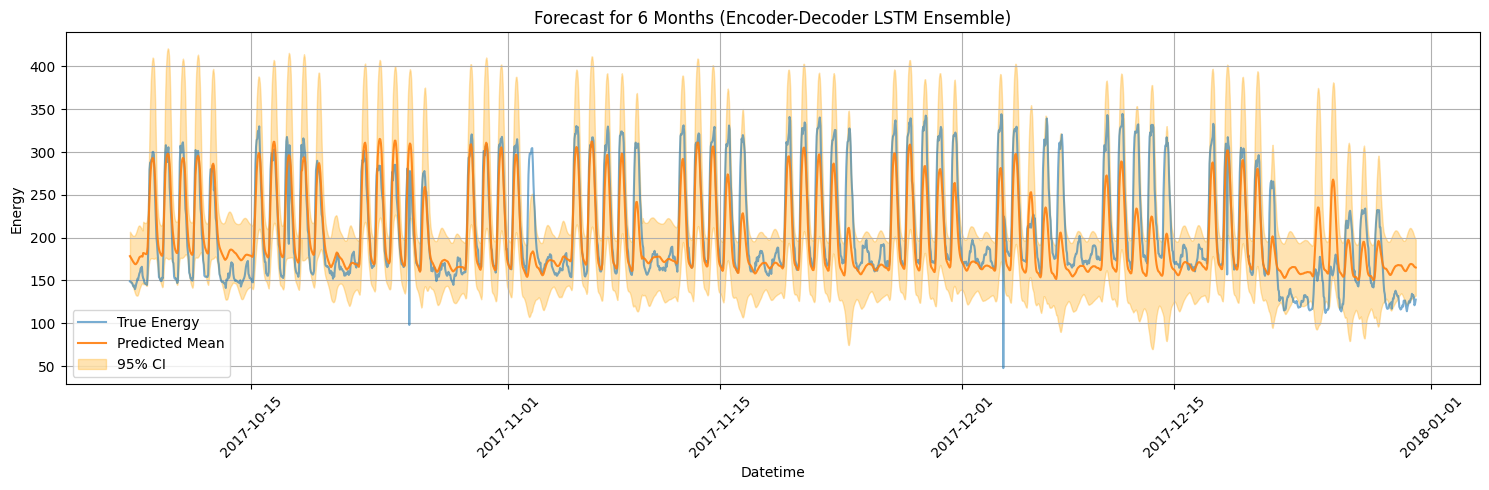

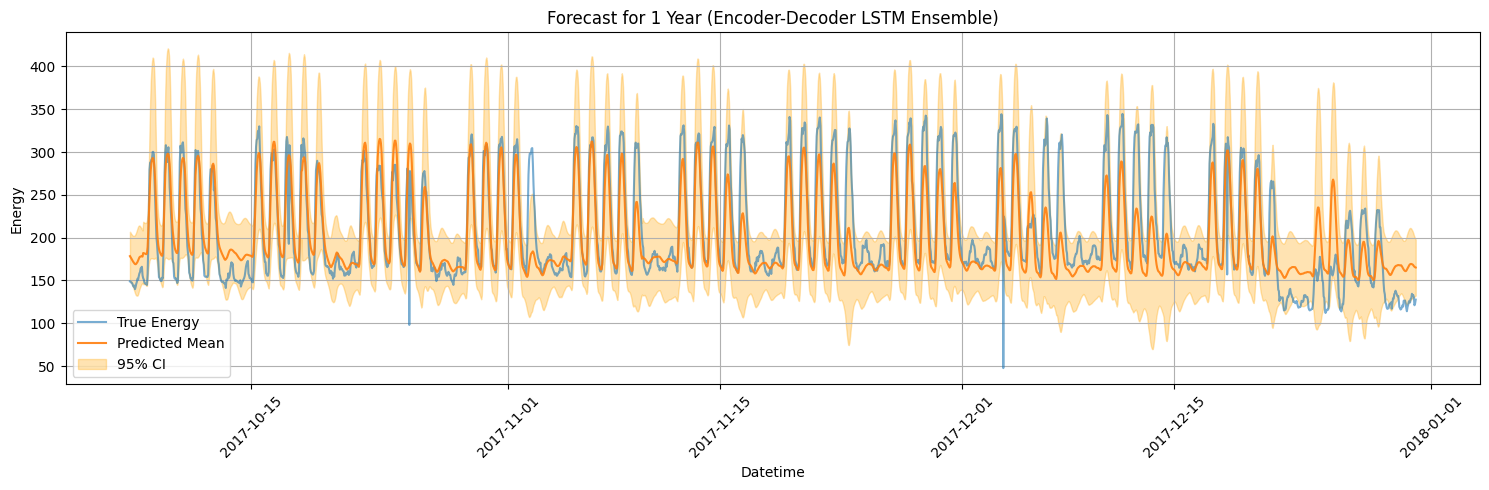

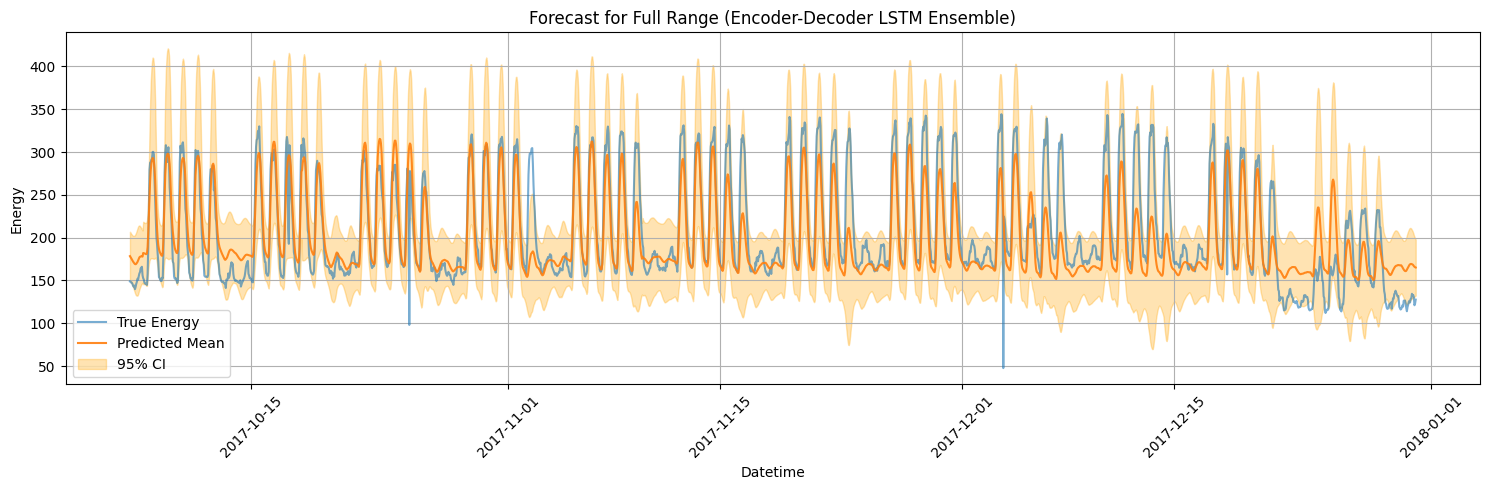

In [29]:
# --- Plot: 1 Week Forecast (Aligned Style) ---
week_indices = (time_test >= time_test.iloc[0]) & (time_test < time_test.iloc[0] + timedelta(weeks=1))
time_week = time_test[week_indices]
true_week = y_test[week_indices]
mean_week = mean_pred[week_indices]
std_week = std_pred[week_indices]

plt.figure(figsize=(15, 5))
plt.plot(time_week, true_week, label="True Energy", alpha=0.6)
plt.plot(time_week, mean_week, label="Predicted Mean", alpha=0.9)
plt.fill_between(time_week, mean_week - 1.96 * std_week, mean_week + 1.96 * std_week,
                 color='orange', alpha=0.3, label="95% CI")
plt.title("Forecast for 1 Week (Encoder-Decoder LSTM Ensemble)")
plt.xlabel("Datetime")
plt.ylabel("Energy")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot: Multiple Time Horizons ---
time_spans = {
    '1 Day': timedelta(days=1),
    '1 Week': timedelta(weeks=1),
    '1 Month': timedelta(days=30),
    '3 Months': timedelta(days=90),
    '6 Months': timedelta(days=180),
    '1 Year': timedelta(days=365),
    'Full Range': time_test.iloc[-1] - time_test.iloc[0]
}

for label, delta in time_spans.items():
    start_time = time_test.iloc[0]
    end_time = start_time + delta
    mask = (time_test >= start_time) & (time_test <= end_time)
    if mask.sum() == 0:
        continue
    time_range = time_test[mask]
    true_values = y_test[mask]
    mean_values = mean_pred[mask]
    std_values = std_pred[mask]

    plt.figure(figsize=(15, 5))
    plt.plot(time_range, true_values, label="True Energy", alpha=0.6)
    plt.plot(time_range, mean_values, label="Predicted Mean", alpha=0.9)
    plt.fill_between(time_range, mean_values - 1.96 * std_values, mean_values + 1.96 * std_values,
                     color='orange', alpha=0.3, label="95% CI")
    plt.title(f"Forecast for {label} (Encoder-Decoder LSTM Ensemble)")
    plt.xlabel("Datetime")
    plt.ylabel("Energy")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()